# HOUSING PRICE PREDICTION USING MULTIPLE LINEAR REGRESSION

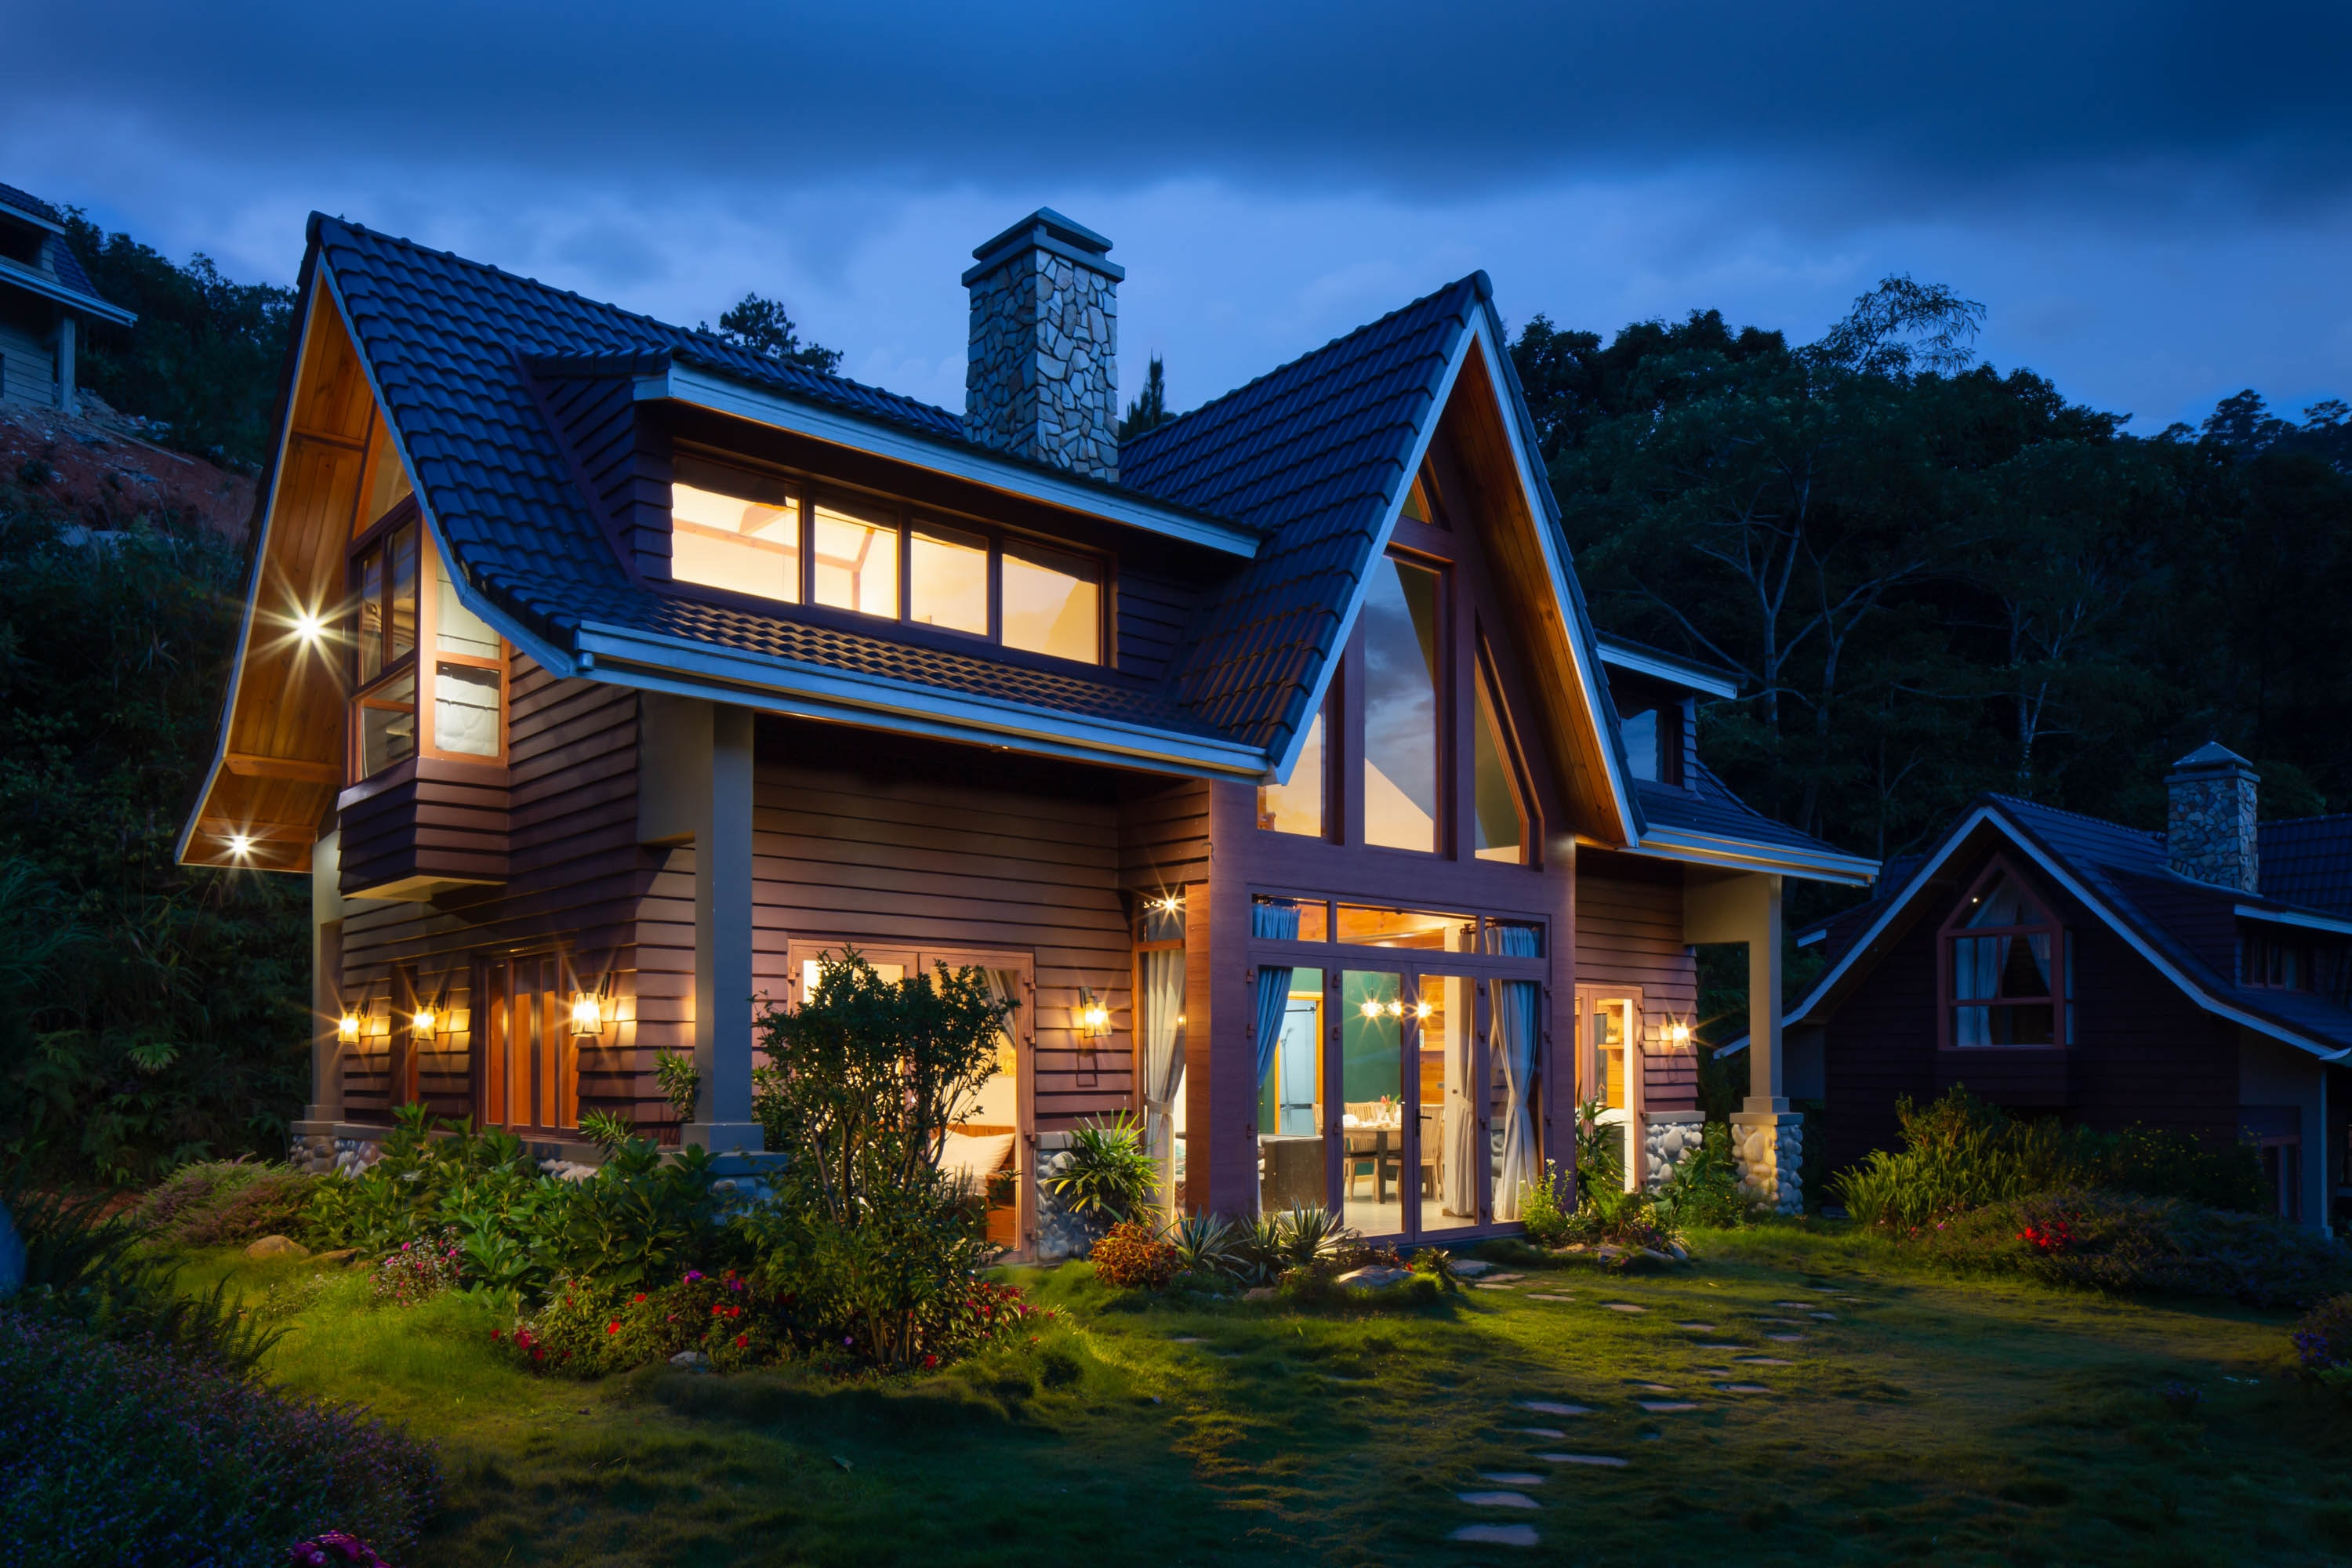

## INTRODUCTION

Our client is a real estate agency who plans on expanding their real estate business within the King County. In this project, we will explore the King County housing market and investigate the factors that influence housing prices. We will use historical data to determine which factors have the greatest impact on housing prices, and then use multiple regression techniques to build a model that can predict housing prices based on these factors. This will provide valuable insights for both buyers and sellers in the housing market, and help them make more informed decisions.

## BUSINESS UNDERSTANDING


In the King County housing market, buyers and sellers need to have a clear understanding of the current market conditions and the factors that influence housing prices in order to make informed decisions. This project aims to address this need by providing a better understanding of the King County housing market and by developing a model that can accurately predict housing prices. This will provide valuable information for our real estate agent to make better decisions about buying, selling, or investing in the housing market. Additionally, this project will also come in handy for policymakers and city planners who want to understand the drivers of housing prices and take appropriate actions.


## DEFINE THE RESEARCH QUESTION

"What factors influence housing prices in King County, and how well can a multiple linear regression model predict housing prices based on those factors?"

## OBJECTIVES


### Main Objective

To build a regression model to predict the dependent variable (Housing Sales Price) using our independent variables.

### Specific Objectives

1. Exploratory Data Analysis of the dataset to understand each data feature and their relationship among each other and to the target, the housing sale price.
2. To identify the variables affecting house prices.
3. To create a linear model that quantitatively relates house prices with variables
4. Evaluating our model on how well these variables can predict house prices.
5. Come up with recommendations upon interpreting our regression model.



## DATA UNDERSTANDING

The data used in this project was obtained from Canvas Project Description. It was shared on a shared repository where it can be pulled from the repository in the data folder consisting of a csv file named kc_house_data.csv. 

The data for this study includes information on (no. of homes) properties sold in kc county. Our data has 21597 rows and 20 columns.
Below are the Column Names and Description for King County Data Set:-

- `id` - Unique identifier for a house
- `date` - Date house was sold
- `price` - Sale price (prediction target)
- `bedrooms` - Number of bedrooms
- `bathrooms` - Number of bathrooms
- `sqft_living` - Square footage of living space in the home
- `sqft_lot` - Square footage of the lot
- `floors` - Number of floors (levels) in house
- `waterfront` - Whether the house is on a waterfront
- `view` - Quality of view from house
- `condition` - How good the overall condition of the house is. Related to the maintenance of the house.
- `grade` - Overall grade of the house. Related to the construction and design of the house.
- `sqft_above` - Square footage of house apart from basement
- `sqft_basement` - Square footage of the basement
- `yr_built` - Year when the house was built
- `yr_renovated` - Year when the house was renovated
- `zipcode` - ZIP Code used by the the United States Postal Service
- `lat` - Latitude coordinate
- `long` - Longitude coordinate
- `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
- `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


## IMPORTS

In [1]:
#importing the necessary libraries 
import pandas as pd #for data manipulation and analysis
import numpy as np #for performing quick operations on numerical data
import matplotlib.pyplot as plt # to form plots
import seaborn as sns #for data visualization
import folium # to visualize maps
# to view matplotlib plots in the jupyter notebooks
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')



### Preview the Data

In [2]:
df = pd.read_csv('kc_house_data.csv')
df.head()

id        date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  10/13/2014  221900.0         3       1.00         1180   
1  6414100192   12/9/2014  538000.0         3       2.25         2570   
2  5631500400   2/25/2015  180000.0         2       1.00          770   
3  2487200875   12/9/2014  604000.0         4       3.00         1960   
4  1954400510   2/18/2015  510000.0         3       2.00         1680   

   sqft_lot  floors waterfront  view  ...          grade sqft_above  \
0      5650     1.0        NaN  NONE  ...      7 Average       1180   
1      7242     2.0         NO  NONE  ...      7 Average       2170   
2     10000     1.0         NO  NONE  ...  6 Low Average        770   
3      5000     1.0         NO  NONE  ...      7 Average       1050   
4      8080     1.0         NO  NONE  ...         8 Good       1680   

   sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
0            0.0     1955           0.0    98178  47.5112 -122.257   
1          400.0     1951        1991.0    98125  47.7210 -122.319   
2            0.0     1933           NaN    98028  47.7379 -122.233   
3          910.0     1965           0.0    98136  47.5208 -122.393   
4            0.0     1987           0.0    98074  47.6168 -122.045   

   sqft_living15  sqft_lot15  
0           1340        5650  
1           1690        7639  
2           2720        8062  
3           1360        5000  
4           1800        7503  

[5 rows x 21 columns]

### Summary of the Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  


## Cleaning the Data

### 1. Data Types

The first step of our data cleaning process was to ensure that all the columns are encoded as the correct data type.

The summary above showed us two columns, date and sqft_basement are encoded as objects, while zipcode is encoded as integer. 

We recoded the column sqft_basement as an integer, and the column zipcode as an object, since zipcode appears like a categorical variable.

It is likely that the column sqft_basement was encoded as an object because it probably contains a non-number value, which we investigated by checking a count of its unique values.

In [4]:
df.sqft_basement.unique()[:10]

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0'], dtype=object)

We dropped all the rows that contained the ?. 

In [5]:
# drop rows that have ?
df = df[df.sqft_basement != '?']

In [6]:
#convert sqft_basement column from string to float
df['sqft_basement'] = df['sqft_basement'].astype("float")

In [7]:
#verify that the code works by checking the data types
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront        object
view              object
condition         object
grade             object
sqft_above         int64
sqft_basement    float64
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### 2. Removing Missing Values

The sqft_basement variable is now converted to float. Next we checked for missing values and figured out the best way to deal with them. 

In [8]:
#this returns the total number of null values in each column
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2339
view               61
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3754
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

The total amount of missing data in the waterfront and yr_renovated is quite significant.

Thus we went ahead and had a closer look at the data to investigate the best way to deal with the missing values.

#### View

In [9]:
#summary statistics of the view column
df.view.describe()

count     21082
unique        5
top        NONE
freq      19018
Name: view, dtype: object

In [10]:
df.view.value_counts()

NONE         19018
AVERAGE        930
GOOD           496
FAIR           327
EXCELLENT      311
Name: view, dtype: int64

In [11]:
#replace categories with values
#this will help in later stages of the analysis
view_var = {"view": {"NONE":0, "AVERAGE":1, "GOOD":2, "FAIR": 3, "EXCELLENT": 4}}
df = df.replace(view_var)


In [12]:
#double check that the values are now replaced
df.view.describe()

count    21082.000000
mean         0.196708
std          0.689332
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

In [13]:
#replace all the null values with the view column mode
df.view = df.view.fillna(value = df.view.median())

#### Condition

In [14]:
df.condition.value_counts()

Average      13726
Good          5557
Very Good     1666
Fair           166
Poor            28
Name: condition, dtype: int64

In [15]:
#replace categories with values
#this will help in later stages of the analysis
condition_var = {"condition": {"Poor":0, "Fair":1, "Average":2, "Good": 3, "Very Good": 4}}
df= df.replace(condition_var)

In [16]:
df.condition.value_counts()

2    13726
3     5557
4     1666
1      166
0       28
Name: condition, dtype: int64

#### Waterfront

In [17]:
#to check how many properties are actually waterfront
df.waterfront.value_counts()

NO     18662
YES      142
Name: waterfront, dtype: int64

In [18]:
#replace categories with values
#this will help in later stages of the analysis
waterfront_var = {"waterfront": {"NO":0, "YES": 1}}
df = df.replace(waterfront_var)

In [19]:
#replace all the null values with the view waterfront mode
df.waterfront = df.waterfront.fillna(value=df.waterfront.median())

For both the view and waterfront, we replaced the missing values with the median.

#### yr_renovated

In [20]:
#to get the summary statistics of the yr_renovated column
df.yr_renovated.describe()

count    17389.000000
mean        82.991949
std        398.481819
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [21]:
df.yr_renovated.value_counts().head(20)

0.0       16666
2014.0       69
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2009.0       21
2004.0       21
2006.0       20
1989.0       18
2002.0       17
1998.0       15
1999.0       15
2008.0       15
1983.0       15
1984.0       15
2015.0       14
2010.0       14
Name: yr_renovated, dtype: int64

It looks like of the 17389 people who gave provided non-null data on the year their house was renovated, less than 1000 people actually had their house
renovated (I'm assuming that people who entered "0" for the year the house was renovated are claiming that their home was never renovated). I'm going to
replace the null values in the yr renovated column with the median for the data (which is 0) because it seems like a safe assumption that most people haven't
had their homes renovated

In [22]:
df.yr_renovated = df.yr_renovated.fillna(value=df.yr_renovated.median())

### 3. Checking and Handling Multicollinearity

The data doesnot now have any missing values. Next, we use a heatmap to check for multicollinearity between the variables in our data set.

However, we decided to first drop the id column as it doesn't provide any insight into the selling price of a house.

In [23]:
#drop ID column from our dataset
df = df.drop(['id'], axis = 1)

Text(0.5, 1.0, 'Heat Map to Check for Multicollinearity')

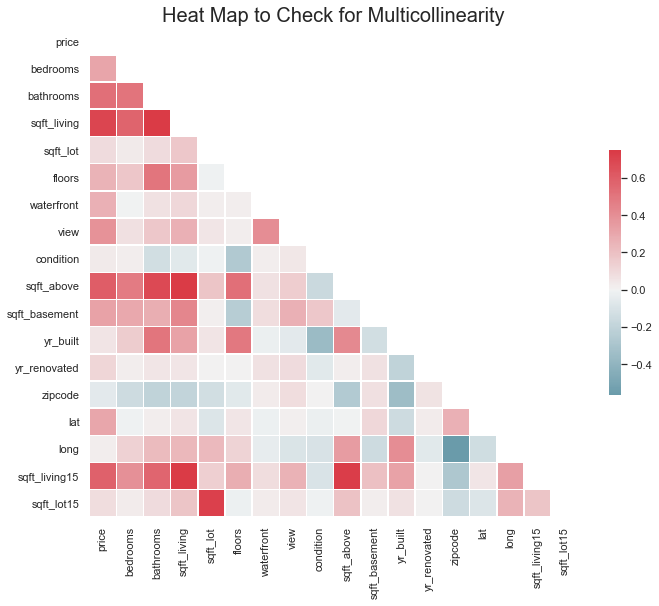

In [24]:
sns.set(style = 'white')
#making a covariance matrix
corr = df.corr()

#to generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

#Set up the matplottib figure
f, ax = plt.subplots (figsize=(11, 9))

#Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

#Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.75, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink":.5})
ax.set_title('Heat Map to Check for Multicollinearity', fontsize = 20)


There could be a pretty high level of multicollinearity between some of these variables, just by looking at some of the dark patches on my heatmap. Let's look at table to see things more clearly.


In [25]:
#provides a table displaying "true" where correlations between two
#variables are greater than .75
abs(corr) > 0.75

price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
price           True     False      False        False     False   False   
bedrooms       False      True      False        False     False   False   
bathrooms      False     False       True         True     False   False   
sqft_living    False     False       True         True     False   False   
sqft_lot       False     False      False        False      True   False   
floors         False     False      False        False     False    True   
waterfront     False     False      False        False     False   False   
view           False     False      False        False     False   False   
condition      False     False      False        False     False   False   
sqft_above     False     False      False         True     False   False   
sqft_basement  False     False      False        False     False   False   
yr_built       False     False      False        False     False   False   
yr_renovated   False     False      False        False     False   False   
zipcode        False     False      False        False     False   False   
lat            False     False      False        False     False   False   
long           False     False      False        False     False   False   
sqft_living15  False     False      False         True     False   False   
sqft_lot15     False     False      False        False     False   False   

               waterfront   view  condition  sqft_above  sqft_basement  \
price               False  False      False       False          False   
bedrooms            False  False      False       False          False   
bathrooms           False  False      False       False          False   
sqft_living         False  False      False        True          False   
sqft_lot            False  False      False       False          False   
floors              False  False      False       False          False   
waterfront           True  False      False       False          False   
view                False   True      False       False          False   
condition           False  False       True       False          False   
sqft_above          False  False      False        True          False   
sqft_basement       False  False      False       False           True   
yr_built            False  False      False       False          False   
yr_renovated        False  False      False       False          False   
zipcode             False  False      False       False          False   
lat                 False  False      False       False          False   
long                False  False      False       False          False   
sqft_living15       False  False      False       False          False   
sqft_lot15          False  False      False       False          False   

               yr_built  yr_renovated  zipcode    lat   long  sqft_living15  \
price             False         False    False  False  False          False   
bedrooms          False         False    False  False  False          False   
bathrooms         False         False    False  False  False          False   
sqft_living       False         False    False  False  False           True   
sqft_lot          False         False    False  False  False          False   
floors            False         False    False  False  False          False   
waterfront        False         False    False  False  False          False   
view              False         False    False  False  False          False   
condition         False         False    False  False  False          False   
sqft_above        False         False    False  False  False          False   
sqft_basement     False         False    False  False  False          False   
yr_built           True         False    False  False  False          False   
yr_renovated      False          True    False  False  False          False   
zipcode           False         False     True  False  Fa

It looks like there's high multicolinearity between sqft living and sqft above, bathrooms, and sqft living15, so I'm going to remove that sqft living. Grade has multicollinearity with sqft living (which we are dropping anyway) and sqft above. I am going to remove grade from our dataset.

In [26]:
#dropping the sqft_living column and the grade_column
df.drop(['sqft_living'], axis=1, inplace=True)
df.drop(['grade'], axis=1, inplace=True)

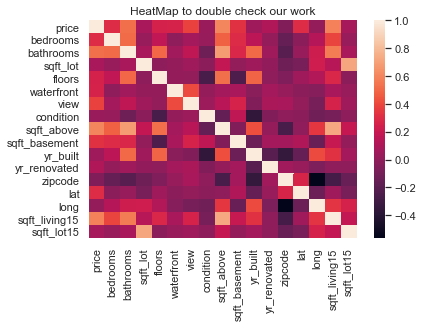

In [27]:
#another heatmap to check our work
sns.heatmap(df.corr()).set(title = 'HeatMap to double check our work')
sns.set(rc={'figure.figsize':(10,10)})

### 3. Outliers

In [28]:
#to scan the data for outliers
df.describe()

price      bedrooms     bathrooms      sqft_lot        floors  \
count  2.114300e+04  21143.000000  21143.000000  2.114300e+04  21143.000000   
mean   5.405107e+05      3.372558      2.116079  1.508714e+04      1.493591   
std    3.680751e+05      0.924917      0.768531  4.120920e+04      0.539249   
min    7.800000e+04      1.000000      0.500000  5.200000e+02      1.000000   
25%    3.220000e+05      3.000000      1.750000  5.043000e+03      1.000000   
50%    4.500000e+05      3.000000      2.250000  7.620000e+03      1.500000   
75%    6.450000e+05      4.000000      2.500000  1.069550e+04      2.000000   
max    7.700000e+06     33.000000      8.000000  1.651359e+06      3.500000   

         waterfront          view     condition    sqft_above  sqft_basement  \
count  21143.000000  21143.000000  21143.000000  21143.000000   21143.000000   
mean       0.006716      0.196141      2.409923   1789.069006     291.851724   
std        0.081679      0.688418      0.650498    828.409769     442.498337   
min        0.000000      0.000000      0.000000    370.000000       0.000000   
25%        0.000000      0.000000      2.000000   1200.000000       0.000000   
50%        0.000000      0.000000      2.000000   1560.000000       0.000000   
75%        0.000000      0.000000      3.000000   2210.000000     560.000000   
max        1.000000      4.000000      4.000000   9410.000000    4820.000000   

           yr_built  yr_renovated       zipcode           lat          long  \
count  21143.000000  21143.000000  21143.000000  21143.000000  21143.000000   
mean    1971.023223     68.256492  98077.868893     47.560274   -122.213876   
std       29.321938    362.765827     53.535756      0.138591      0.140597   
min     1900.000000      0.000000  98001.000000     47.155900   -122.519000   
25%     1952.000000      0.000000  98033.000000     47.471250   -122.328000   
50%     1975.000000      0.000000  98065.000000     47.572000   -122.230000   
75%     1997.000000      0.000000  98117.000000     47.678200   -122.125000   
max     2015.000000   2015.000000  98199.000000     47.777600   -121.315000   

       sqft_living15     sqft_lot15  
count    21143.00000   21143.000000  
mean      1987.27139   12738.941967  
std        685.67034   27169.273663  
min        399.00000     651.000000  
25%       1490.00000    5100.000000  
50%       1840.00000    7626.000000  
75%       2360.00000   10087.000000  
max       6210.00000  871200.000000

#### bedrooms

Text(0.5, 1.0, 'Outliers for Bedrooms')

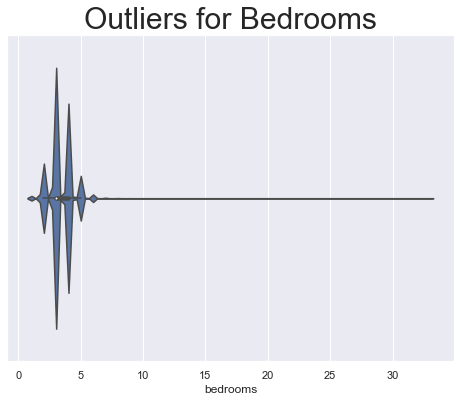

In [29]:
#it's strange that bedrooms went all the way to the 33
plt.figure(figsize=(8,6))

#use a violin plot to check for outliers
sns.violinplot(df.bedrooms)
plt.title('Outliers for Bedrooms', fontsize = 30)

In [30]:
#take a closer look at the top five values in bedrooms
df.bedrooms.sort_values(ascending = False).head()

15856    33
8748     11
15147    10
19239    10
13301    10
Name: bedrooms, dtype: int64

In [31]:
#have a closer look at the rows that have 33 and 11 bedrooms (respectively) in them
print(df.loc[[15856]])
print(df.loc[[8748]])

            date     price  bedrooms  bathrooms  sqft_lot  floors  waterfront  \
15856  6/25/2014  640000.0        33       1.75      6000     1.0         0.0   

       view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
15856   0.0          4        1040          580.0      1947           0.0   

       zipcode      lat     long  sqft_living15  sqft_lot15  
15856    98103  47.6878 -122.331           1330        4700  
           date     price  bedrooms  bathrooms  sqft_lot  floors  waterfront  \
8748  8/21/2014  520000.0        11        3.0      4960     2.0         0.0   

      view  condition  sqft_above  sqft_basement  yr_built  yr_renovated  \
8748   0.0          2        2400          600.0      1918        1999.0   

      zipcode     lat     long  sqft_living15  sqft_lot15  
8748    98106  47.556 -122.363           1420        4960  


In [32]:
#judging by the data in those rows, we thought that both were just entered incorrectly
#we dropped both of those rows.
df = df[df.bedrooms <= 10]

In [33]:
#checking if the outliers were dropped
df.bedrooms.sort_values(ascending = False).head()

13301    10
15147    10
19239    10
18428     9
6073      9
Name: bedrooms, dtype: int64

## Exploratory Data Analysis

### 1. Relationships with our Zipcode data

Location is widely regarded to be one of the most important features of a house when determing its value.

We would like to:

- See if the zipcode a house is located in has an effect on the price of the house. 

- Investigate whether the number of houses sold differs from zipcode to zipcode

To answer these questions, we are going to make a separate dataframe that is grouped by zipcode and find the average price of houses for each zipcode.

We will also generate a separate column to reflect the number of houses sold within each zipcode.

In [34]:
# creating a new dataframe for the zipcode data
df_zipcode=df.groupby("zipcode").aggregate(np.mean) #get the mean value for each column
#resetting the index
df_zipcode.reset_index(inplace=True)
#see how the new dataframe looks like
df_zipcode.head() 


zipcode         price  bedrooms  bathrooms      sqft_lot    floors  \
0    98001  2.817962e+05  3.402266   2.020538  14834.577904  1.436261   
1    98002  2.345127e+05  3.333333   1.843434   7505.853535  1.335859   
2    98003  2.949962e+05  3.336996   2.043040  10629.216117  1.307692   
3    98004  1.357423e+06  3.857143   2.527778  13121.066667  1.428571   
4    98005  8.102914e+05  3.838323   2.422156  19991.233533  1.281437   

   waterfront      view  condition   sqft_above  sqft_basement     yr_built  \
0    0.000000  0.065156   2.334278  1728.742210     184.107649  1981.175637   
1    0.000000  0.005051   2.742424  1524.166667     105.737374  1968.010101   
2    0.000000  0.175824   2.377289  1662.267399     265.761905  1976.864469   
3    0.003175  0.346032   2.495238  2418.444444     492.285714  1971.314286   
4    0.000000  0.089820   2.694611  2160.077844     488.862275  1969.742515   

   yr_renovated        lat        long  sqft_living15    sqft_lot15  
0     22.558074  47.309118 -122.270745    1832.288952  11225.521246  
1     50.176768  47.308779 -122.213374    1481.146465   7598.060606  
2     14.630037  47.316058 -122.309963    1874.589744   9777.366300  
3    177.793651  47.616229 -122.205251    2676.031746  12778.514286  
4     47.916168  47.611627 -122.167204    2568.329341  18419.227545

In [35]:
#create a df for number of houses based on zipcode
df["count"] = 1
count_zip = df.groupby("zipcode").sum()
count_zip.reset_index(inplace=True)
#eliminating everything
count_zip = count_zip[["zipcode", "count"]]
#joining
df_zipcode = pd.merge(df_zipcode, count_zip, on="zipcode")
#removing the count
df.drop(["count"], axis = 1, inplace = True)  


In order to view our zipcodes on a map, we need the geoJson data. A quick google search of "King County, WA geojson" provided me with geojson data.

We downloaded the data as a kml file and then used an online converter and converted the kml file into a geojson file.

To explore our geojson file, we went ahead and previewed the file within this notebook.


In [36]:
#importing json
import json
# opening the file
f = open("kingscounty.json")
#loading the file
zip_geo= json.load(f)


In [37]:
#check the root data type
type(zip_geo)

dict

In [38]:
#check keys
zip_geo.keys()

dict_keys(['features', 'type'])

In [39]:
#investigate keys further
zip_geo['type']

'FeatureCollection'

In [40]:
#preview first entry in 'features'
features_preview = zip_geo['features'][0]

Our geojson data loaded properly and it looks as expected.

In [41]:
import gmaps
import gmaps.datasets 
import gmaps.geojson_geometries

In [42]:
Lon = np.linspace(df.long.min(), df.long.max(), 100) 
Lat = np.linspace(df.lat.min(), df.lat.max(), 100) 

lat_increment = abs(Lat[1] - Lat[0])
long_increment = abs(Lon[1] - Lon[0])

In [43]:
house_counts = np.zeros((100,100)) 

for house in range(len(df)):
    i0 = int(abs(df['lat'].values[house] - df['lat'].min()) // lat_increment)
    i1 = int(abs(df['long'].values[house] - df['long'].min()) // long_increment)
    house_counts[i0, i1] += 1
    
longitude_values = [Lon,]*100 
latitude_values = np.repeat(Lat,100) 

house_counts.resize((10000,)) 

heatmap_data = {'Counts': house_counts, 
                'latitude': latitude_values, 
                'longitude' : np.concatenate(longitude_values)} 

In [44]:
df_map = pd.DataFrame(data=heatmap_data)
with open('kingscounty.json') as f:
    geometry = json.load(f)
zipcodes_layer = gmaps.geojson_layer(geometry, fill_opacity=0)

In [45]:
locations = df_map[['latitude', 'longitude']] 
weights = df_map['Counts'] 
fig = gmaps.figure(center=(47.6092,-122.3363), zoom_level=10)
heatmap_layer = gmaps.heatmap_layer(locations, weights=weights) 
fig.add_layer(heatmap_layer)
fig.add_layer(zipcodes_layer)
fig 

Figure(layout=FigureLayout(height='420px'))

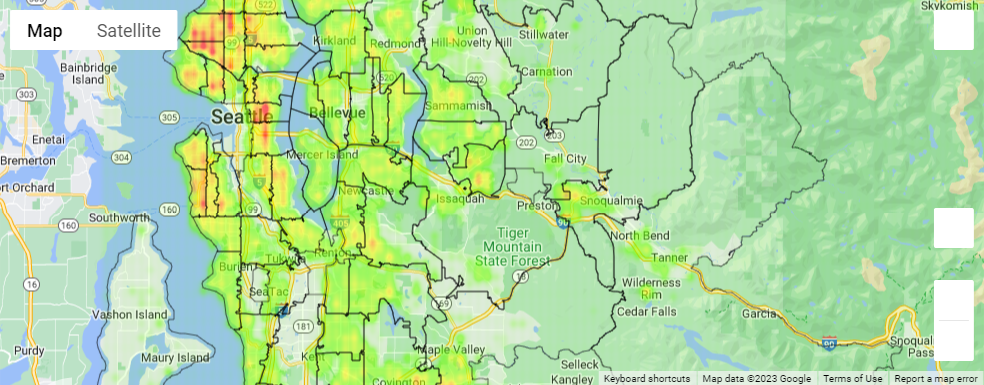

In [46]:
house_price_sums = np.zeros((100,100)) 

for house in range(len(df)):
    i0 = int(abs(df['lat'].values[house] - df['lat'].min()) // lat_increment)
    i1 = int(abs(df['long'].values[house] - df['long'].min()) // long_increment)
    house_price_sums[i0, i1] += df['price'].values[house]

In [47]:
house_price_sums.resize((10000,))

In [48]:
prices_heatmap_data = {'Counts': house_price_sums, 
                'latitude': latitude_values, 
                'longitude' : np.concatenate(longitude_values)} 
df_prices_map = pd.DataFrame(data=prices_heatmap_data) 

In [49]:
with open('kingscounty.json') as f:
    geometry = json.load(f)
zipcodes_layer = gmaps.geojson_layer(geometry, fill_opacity=0)

In [50]:
with open('usacountyshapefile.json') as f:
    geometry = json.load(f)
county_layer = gmaps.geojson_layer(geometry, fill_opacity=0.1)

In [51]:
locations = df_prices_map[['latitude', 'longitude']] 
weights = df_prices_map['Counts'] 
fig = gmaps.figure(center=(47.6092,-122.3363), zoom_level=10)

# zipcode markers for top 3 most active markets
zip_98103 = gmaps.Marker((47.671, -122.342), info_box_content='98103 Seattle')
zip_98038 = gmaps.Marker((47.382, -122.036), info_box_content='98038 Maple Valley')
zip_98115 = gmaps.Marker((47.684, -122.301), info_box_content='98115 Seattle')
zip_markers = gmaps.drawing_layer(features=[zip_98103, zip_98038, zip_98115], show_controls=False)

fig.add_layer(zip_markers)
fig.add_layer(zipcodes_layer)
fig.add_layer(county_layer)
fig.add_layer(gmaps.heatmap_layer(locations, weights=weights)) 
fig 

Figure(layout=FigureLayout(height='420px'))

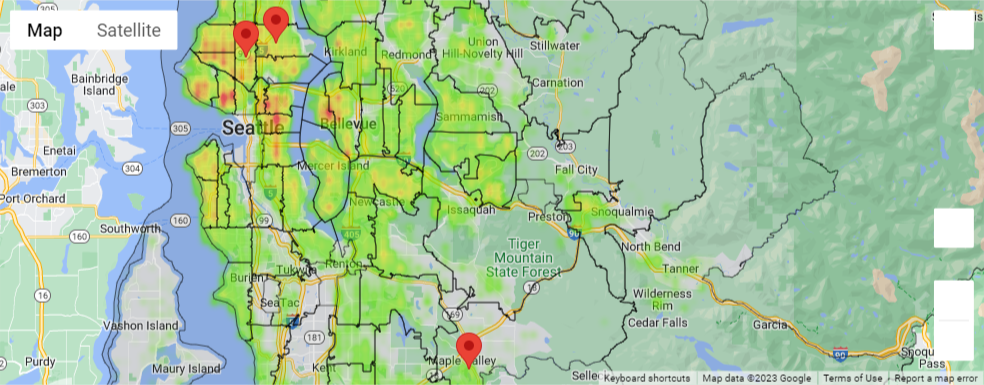

For price by zipcode, there are clearly some countles that have higher costing houses than others looks like zipcode 98039 is by far the most expensive area. The second and third most expensive, zipcodes 98004 and 98040, are directly to the right and directly under 98039, respectively. As you move further from Seattle's downtown area, the houses start costing less.

The relationship between count and zip is clearly there as well, as you can see a dynamic color range on the map. It looks like in particular, the zipcodes thatsell the most houses are in the north east region of the county just under the border and the lower center of county around zipcodes 98042, 98038 and just
above that, zipcode 98108. It looks like the further east you go in the county, the less houses are sold.



### 2. Relationships with Our Date Column

We want to know whether or not the date that a house was sold has any effect on certain variables. We were curious on whether waterfront properties are worth more than their non-waterfront counterparts, but also if waterfront properties typically sell for more when the weather is nice.

We also wanted to know whether or not people will be paying more for houses that they view depending on what time of year it is.

We think that a large portion of what makes people spend money on houses is dependant on how well they can picture themselves being happy there.

We were wondering if maybe people are thinking more about family during the winter months, which will maybe cause them to look at houses in a different way when they physically view them.


In [52]:
#convert date so that pandas knows it's a date, then we can do more with it
df['date'] = pd.to_datetime(df['date']) 

In [53]:
#creating a separate column that just extracts the month from the original date column
df['month'] = df['date'].dt.month


The season is what we want to pay attention to, so we are not very concerned with day or year.

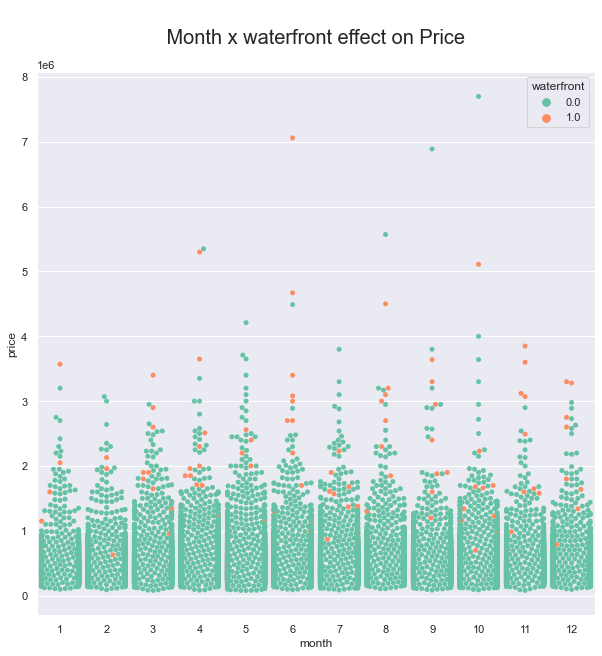

In [54]:
#making graph Large enough to see
plt.figure(figsize=(10,10)) 
plt.title('\n Month x waterfront effect on Price \n', fontsize=20) #adding a title
ax= sns.swarmplot (x="month", y="price", hue="waterfront", data=df, palette="Set2") #defining what variables we want


It looks as though the amount of times a house is viewed as well as how much it sells for is relatively even across the months, leading us to believe there is
not a clear relationship between the weather and whether or not someone will be spending more money on a house that they have viewed.

However, our 2 lowest selling houses that had been viewed were in February and September and our few highest priced houses that had been viewed were mostly in the summer months, though the highest selling house that had been viewed was sold in October. There is not a huge amount of data for our view column so it is hard to make conclusions.

On another note, it seems as though there's a positive correlation between the number of times a house is viewed and how much it sells for.


### Categorical Data

We will split our dataframe in 2 parts to deal with the numerical data and the categorical data separately, since they each require different measures to be
effectively cleaned.

We are going to treat about half of the data as categorical. We are binning view, yr renovated, date and yr_built. Then we will encode condition, waterfront and zipcode as objects.

We are binning this data because it feels more organized for some of categories to be further categorized, such as the date, which we would like to be broken down into seasons.

In [55]:
#creating 2 new dataframes from our existing dataframe, one for categorical data and the other for numerical data
df_cat= df[['month', 'view', 'condition', 'waterfront', 'yr_built', 'yr_renovated', 'zipcode']].copy()
df_num= df[['price', 'bathrooms', 'bedrooms', 'floors', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]

### Binned Categorical Variables

In [56]:
#checking to see the range of values in our data
df_cat.month.unique()

array([10, 12,  2,  5,  1,  4,  3,  7,  8, 11,  6,  9], dtype=int64)

In [57]:
#replacing 12's with 0's so that it will be easier to bin the data into seasons
#this way, if December is coded as "0", I can say months 0-2 represent winter, 3-5 represent spring, etc
df_cat.month= df_cat.month.replace(12, 0)


In [58]:
#making ensure one was successful in replacing 12's with 0's
df_cat.month.unique()

array([10,  0,  2,  5,  1,  4,  3,  7,  8, 11,  6,  9], dtype=int64)

In [59]:
#creating bins values to be organized by
bins = [0, 3, 6, 9, 11]

#showing pandas which column we want to be binned, how many bins (defaults to one Less than the of bins we created, setting l
bins_date= pd.cut (df_cat['month'], bins, include_lowest=True,
                   labels=["winter", "spring", "summer", "fall"])
bins_date= bins_date.cat.as_unordered()

Text(0, 0.5, 'No of Sales')

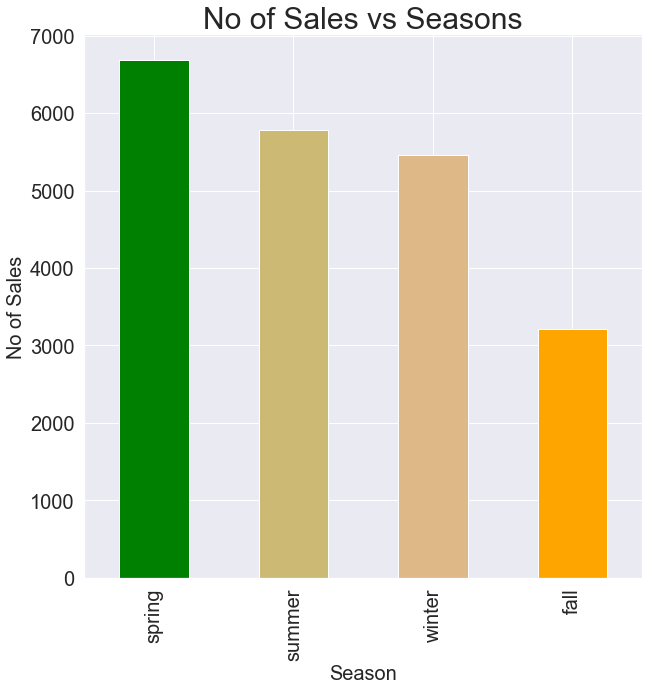

In [60]:
#plotting a bar graph to preview these results
c = ['green', 'y', 'burlywood', 'orange']
bins_date.value_counts().plot(kind="bar", color = c, fontsize = 20, figsize = (10,10))
plt.title('No of Sales vs Seasons', fontsize = 30)
plt.xlabel('Season', fontsize = 20)
plt.ylabel('No of Sales', fontsize = 20)

In [61]:
#to explore the view column
df_cat.view.value_counts()

0.0    19077
1.0      930
2.0      496
3.0      327
4.0      311
Name: view, dtype: int64

In [62]:
bins = [0, 1, 4] #repeating the binning process

#we split view into houses that were viewed and houses that were not viewed because the spread of our data is so zero-he
bins_view= pd.cut(df_cat['view'], bins, include_lowest=True,
                  labels=["not_viewed", "viewed"])
bins_view= bins_view.cat.as_unordered()


Text(0, 0.5, 'No of Houses')

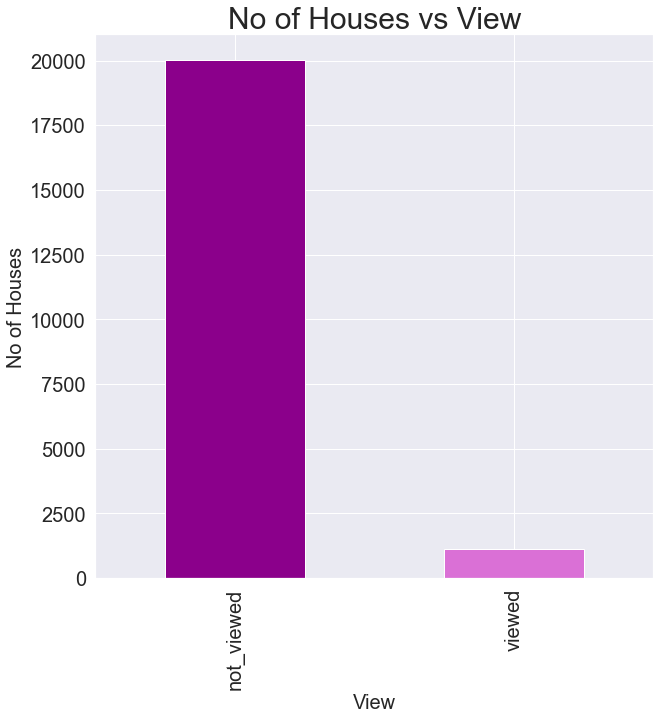

In [63]:
#creating another handy bar graph
c = ['darkmagenta', 'orchid']
bins_view.value_counts().plot(kind="bar", color = c, fontsize = 20, figsize = (10,10))
plt.title('No of Houses vs View', fontsize = 30)
plt.xlabel('View', fontsize = 20)
plt.ylabel('No of Houses', fontsize = 20)

In [64]:
#to see just how spread apart our yr_built column was
#helps us know how large to make the bins
df_cat.yr_built.describe()

count    21141.000000
mean      1971.026867
std         29.320592
min       1900.000000
25%       1952.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [65]:
bins = [1900, 1952, 1975, 1997, 2015]
bins_yr_built = pd.cut(df_cat['yr_built'], bins, include_lowest=True,
                        labels=("1900_thru_1951", "1952_thru_1974", "1975_thru_1996", "1997_thru_2015"))                                                                       
bins_yr_built = bins_yr_built.cat.as_unordered()


Text(0, 0.5, 'No of Houses')

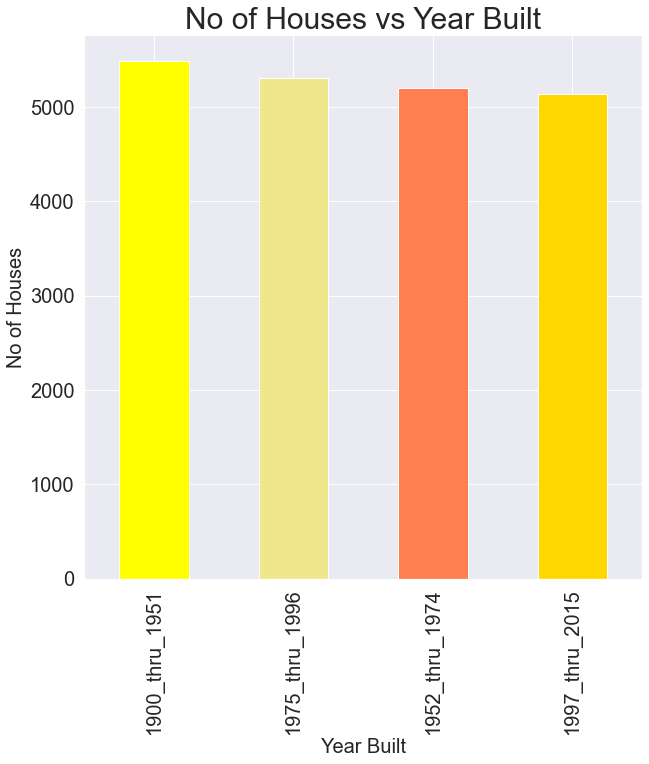

In [66]:
c = ['yellow', 'khaki', 'coral', 'gold']
bins_yr_built.value_counts().plot(kind="bar", color = c, fontsize = 20, figsize = (10,10))
plt.title('No of Houses vs Year Built', fontsize = 30)
plt.xlabel('Year Built', fontsize = 20)
plt.ylabel('No of Houses', fontsize = 20)

In [67]:
#to investigate the yr_renovated
df_cat.yr_renovated.describe() 

count    21141.000000
mean        68.168393
std        362.539556
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

In [68]:
#bin these columns into renovated and not renovated
bins = [0, 1, 2015]
#since it looks like the majority of our houses were not renovated
bins_yr_renovated = pd.cut (df_cat['yr_renovated'], bins, include_lowest = True, labels = ["not_renovated", "renovated"])
bins_yr_renovated=bins_yr_renovated.cat.as_unordered()


Text(0, 0.5, 'No of Houses')

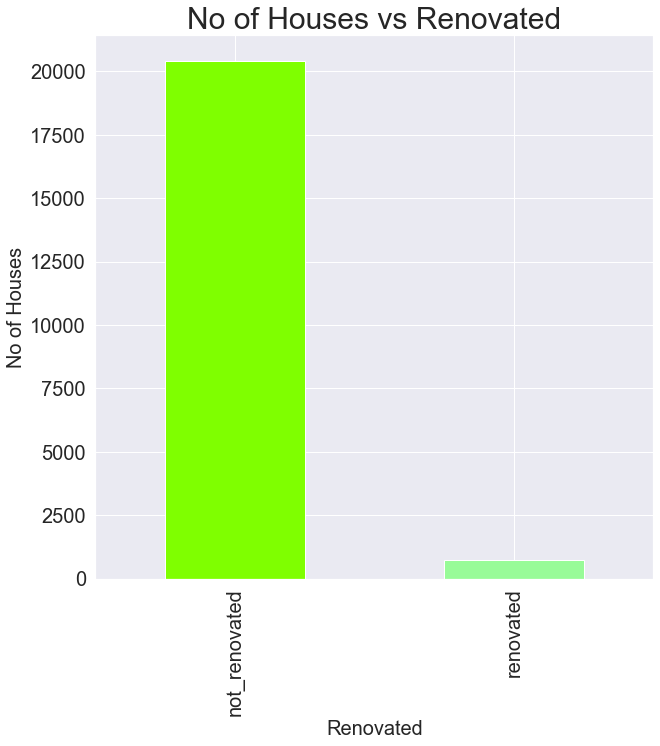

In [69]:
c = ['chartreuse', 'palegreen']
bins_yr_renovated.value_counts().plot(kind='bar', color = c, fontsize = 20, figsize = (10,10))
plt.title('No of Houses vs Renovated', fontsize = 30)
plt.xlabel('Renovated', fontsize = 20)
plt.ylabel('No of Houses', fontsize = 20)

### Remaining Categorical Variables

We have binned the data where it makes sense, now let's encode the rest of our catgeorical data as strings.

Before we do that, we learned that our OLS regression does not like dealing with decimals in our categorical data. To fix this, we are going to quickly get rid of the decimals in a few columns.

In [70]:
#since condition and waterfront both only have whole numbers, we're going to get rid of the
#decimal by making them integers THEN we will encode them as strings
df_cat['condition'] = df_cat['condition'].astype("int")
df_cat['waterfront'] = df_cat['waterfront'].astype("int")


In [71]:
#switching the remaining catogorical columns to objects so that we can one-hot encode them later
df_cat['condition'] = df_cat['condition'].astype("str")
df_cat['waterfront'] = df_cat['waterfront'].astype("str")
df_cat ['zipcode'] = df_cat ['zipcode'].astype("str")

In [72]:
df_cat.info() #let's make sure everything is encoded properly

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21141 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   month         21141 non-null  int64  
 1   view          21141 non-null  float64
 2   condition     21141 non-null  object 
 3   waterfront    21141 non-null  object 
 4   yr_built      21141 non-null  int64  
 5   yr_renovated  21141 non-null  float64
 6   zipcode       21141 non-null  object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.9+ MB


Looks like we need to drop the original columns that we binned so that we can replace them with our binned data

In [73]:
#removing our pre-binned columns
df_cat= df_cat.drop (["view", "month", "yr_built", "yr_renovated"], axis=1)
#removing our pre-binned columns
df_cat= pd.concat([df_cat, bins_date, bins_view, bins_yr_built, bins_yr_renovated], axis=1) 


In [74]:
df_cat.info() # Let's make sure our binned columns are encoded as categories

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21141 entries, 0 to 21596
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   condition     21141 non-null  object  
 1   waterfront    21141 non-null  object  
 2   zipcode       21141 non-null  object  
 3   month         21141 non-null  category
 4   view          21141 non-null  category
 5   yr_built      21141 non-null  category
 6   yr_renovated  21141 non-null  category
dtypes: category(4), object(3)
memory usage: 1.4+ MB


### One-Hot Encoding

The final step in cleaning our categorical data is getting dummy variables from pandas. This is so we can deal with our categorical variables via one-hot
Encoding.

In [75]:
#one-hot encoding our data
df_cat= pd.get_dummies (df_cat)
df_cat.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 21141 entries, 0 to 21596
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   condition_0                 21141 non-null  uint8
 1   condition_1                 21141 non-null  uint8
 2   condition_2                 21141 non-null  uint8
 3   condition_3                 21141 non-null  uint8
 4   condition_4                 21141 non-null  uint8
 5   waterfront_0                21141 non-null  uint8
 6   waterfront_1                21141 non-null  uint8
 7   zipcode_98001               21141 non-null  uint8
 8   zipcode_98002               21141 non-null  uint8
 9   zipcode_98003               21141 non-null  uint8
 10  zipcode_98004               21141 non-null  uint8
 11  zipcode_98005               21141 non-null  uint8
 12  zipcode_98006               21141 non-null  uint8
 13  zipcode_98007               21141 non-null  uint8
 14  zipcod

The categorical columns look as we expected them to.

Now it's time to clean our numerical data. We will start by normalizing everything. The most common way to do this is by converting our data into z-scores. We
will accomplish this by taking each value in a column, subtracting the column's mean from it, and then dividing by the column's standard deviation.

To save us some work, we will use sklearn's built-in functions to test a few ways of normalizing our data, starting with standard scaling (mean normalization, as
discussed above).


#### Mean Normalization

In [76]:
from sklearn.preprocessing import StandardScaler #importing Standardscaler
scaler = StandardScaler() #this is how we will reference Standardscaler
#creating a new dataframe of scaled data

df_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns = df_num.columns) #fitting and transforming our data
# as well as making sure our column names carry over, otherwise our function will just return a numpy array
df_scaled.head() #Let's check it out!


price  bathrooms  bedrooms    floors  sqft_lot  sqft_above  \
0 -0.865584  -1.452211 -0.411682 -0.915345 -0.229023   -0.735241   
1 -0.006811   0.174291 -0.411682  0.939116 -0.190391    0.459830   
2 -0.979417  -1.452211 -1.521946 -0.915345 -0.123466   -1.230169   
3  0.172496   1.150191  0.698583 -0.915345 -0.244796   -0.892169   
4 -0.082881  -0.151010 -0.411682 -0.915345 -0.170057   -0.131670   

   sqft_basement       lat      long  sqft_living15  sqft_lot15  
0      -0.659489 -0.354051 -0.306814      -0.944096   -0.260940  
1       0.244467  1.159746 -0.747799      -0.433639   -0.187734  
2      -0.659489  1.281686 -0.136110       1.068562   -0.172165  
3       1.397011 -0.284783 -1.274136      -0.914927   -0.284864  
4      -0.659489  0.407898  1.201071      -0.273210   -0.192739

Let's continue with our EDA.

A few questions that we would like answered:

1. What is more important to a home buyer, the size of the lot or the size of the house (sqft_above)?

2. Do people appreciate more space inside or outside of their home?

3. What about bathrooms and bedrooms, which matters more to the consumer?

4. Are there any negative relationships in our data?


We are also curious about comparing sqft_lot15 and sqft_living15. We could see sqft_lot15 being important because then people have more space
between them and their neighbor, but we can also imagine that the size of surrouding houses could be important because it reflects a high value on
the neighborhood.

We'll start by just taking a quick look at the summary statistics for the dataset. This lets us get an idea of what we can expect from the data



In [77]:
df_scaled.describe()

price     bathrooms      bedrooms        floors      sqft_lot  \
count  2.114100e+04  2.114100e+04  2.114100e+04  2.114100e+04  2.114100e+04   
mean  -8.066329e-17 -5.377553e-17 -6.856379e-17 -4.302042e-17  6.721941e-18   
std    1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00  1.000024e+00   
min   -1.256529e+00 -2.102811e+00 -2.632211e+00 -9.153446e-01 -3.535070e-01   
25%   -5.936349e-01 -4.763100e-01 -4.116818e-01 -9.153446e-01 -2.437522e-01   
50%   -2.458874e-01  1.742905e-01 -4.116818e-01  1.188588e-02 -1.812190e-01   
75%    2.838843e-01  4.995908e-01  6.985829e-01  9.391163e-01 -1.065770e-01   
max    1.945075e+01  7.656196e+00  7.360171e+00  3.720808e+00  3.970561e+01   

         sqft_above  sqft_basement           lat          long  sqft_living15  \
count  2.114100e+04   2.114100e+04  2.114100e+04  2.114100e+04   2.114100e+04   
mean  -2.688776e-17  -4.839797e-17  2.071803e-14  7.020395e-15  -8.604084e-17   
std    1.000024e+00   1.000024e+00  1.000024e+00  1.000024e+00   1.000024e+00   
min   -1.713026e+00  -6.594892e-01 -2.917692e+00 -2.170332e+00  -2.316495e+00   
25%   -7.110981e-01  -6.594892e-01 -6.426681e-01 -8.118131e-01  -7.253288e-01   
50%   -2.765268e-01  -6.594892e-01  8.464696e-02 -1.147719e-01  -2.148721e-01   
75%    5.081158e-01   6.060495e-01  8.509254e-01  6.320579e-01   5.435207e-01   
max    9.199541e+00   1.023318e+01  1.568139e+00  6.393317e+00   6.158544e+00   

         sqft_lot15  
count  2.114100e+04  
mean   2.688776e-18  
std    1.000024e+00  
min   -4.449310e-01  
25%   -2.811831e-01  
50%   -1.882122e-01  
75%   -9.763375e-02  
max    3.159611e+01

It's nice to have the actual numbers, but we could probably interpret the data alot faster if we visualize it. Let’s make more histograms to see how frequently each value in a column occurs.

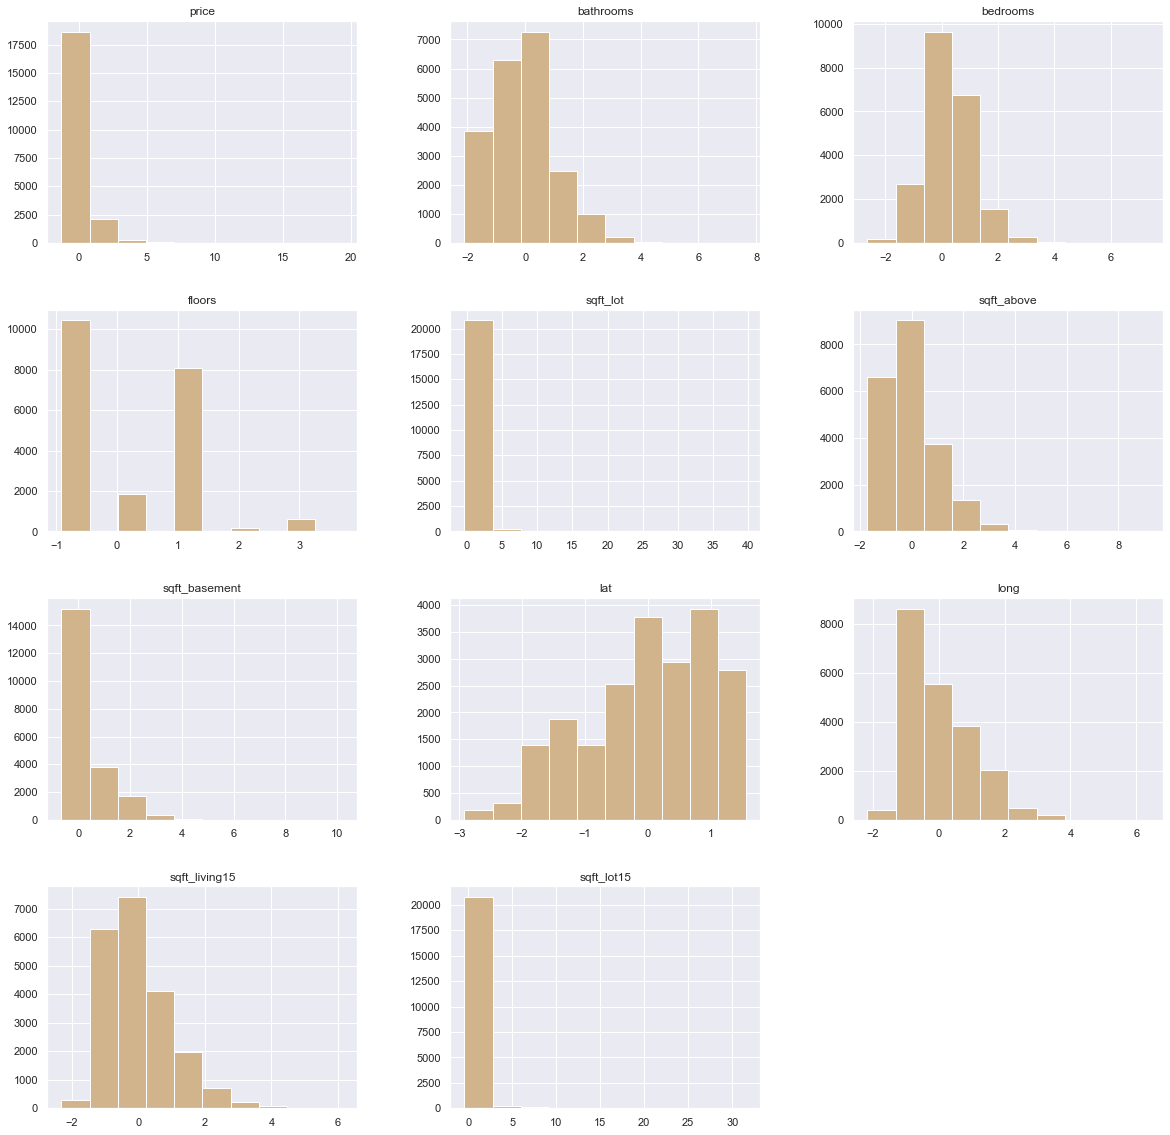

In [78]:
#this function gives us histogram for each column
df_scaled.hist(figsize = (20,20), color = "tan");

Bedrooms is very normal, which is good. It doesn't look like any of our other columns are really normally distributed, with the exception of sqft_livng15,
sqft above, bathrooms and long, which look closer to normal than the other plots, though they are still slightly positively skewed

Even so, we see a lot of skewness and kurtosis among the histograms. A good amount of these plots are highly positively skewed - sqft_lot,
sqft_basement, floors, sqft_lot15, and price.

Interestingly, lat is the only plot that is negatively skewed.

To examine these distributions more throroughly, we're going to lay a "Kernel Density Estimation" (KDE) plot on top of each histogram. But first, let's take a peak at what happens when we scale the data a different way.


#### Min-Max Normalization

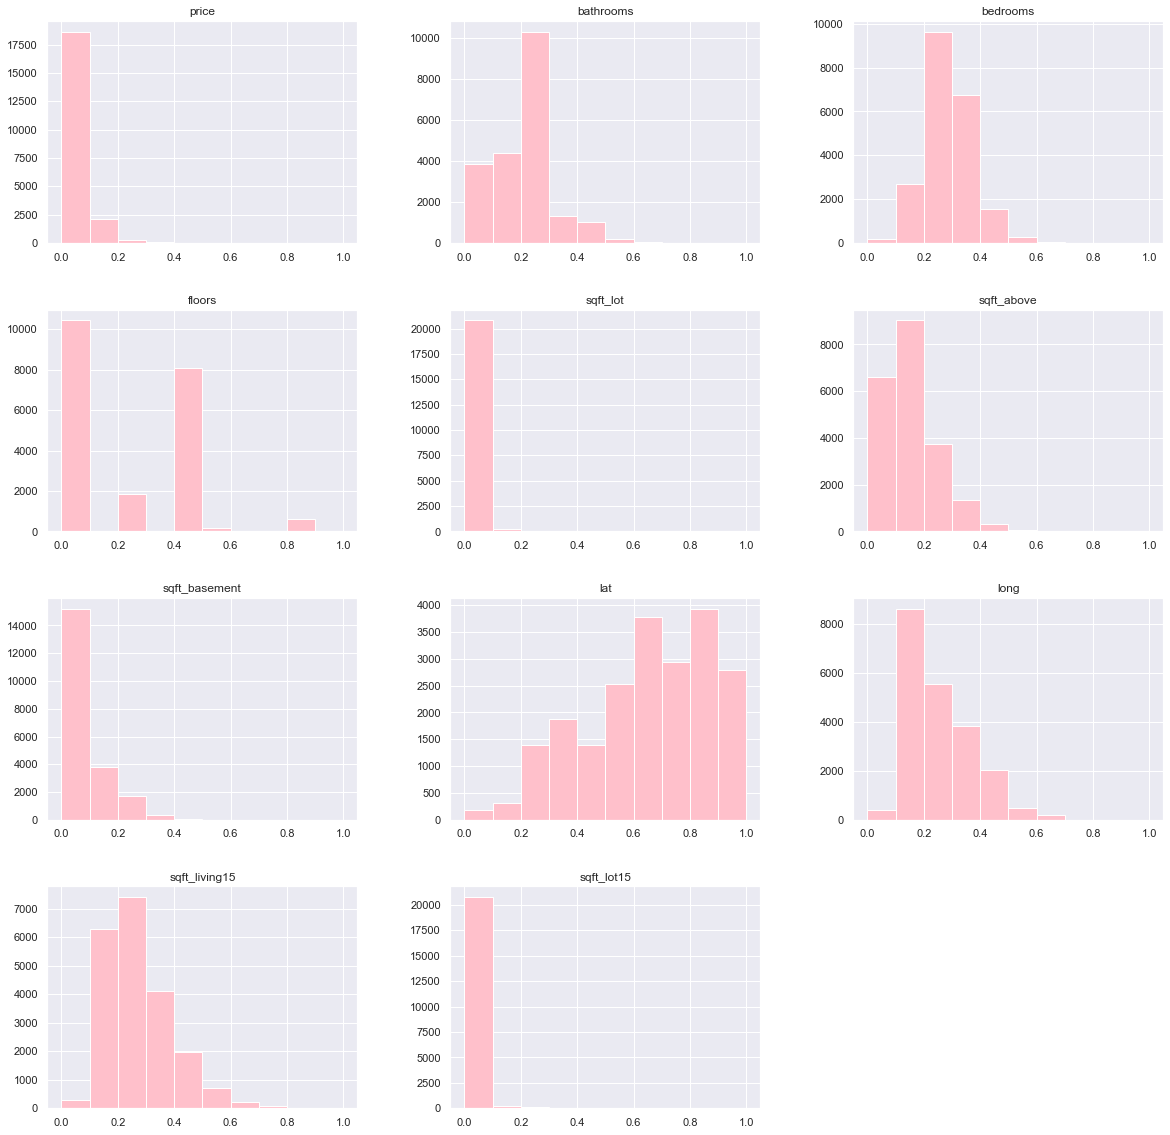

In [79]:
#let's just see how things change when we use a min-max scaler (normalization using y= (x-min)/(max-min))
from sklearn.preprocessing import MinMaxScaler #importing the MinMax Scaler
mmscaler = MinMaxScaler() #this is how we will reference said scaler
df_minmax = pd.DataFrame (mmscaler.fit_transform(df_num), columns = df_num.columns)
df_minmax.hist(figsize= (20,20), color= "pink"); #Let's make a histogram to compare


As you can see, the shape of the histograms look pretty similiar. The most obvious difference between our standard scaled data and our Min-Max scaled data
is that the Min-Max contains only positive numbers.

We can see from the plots above that unlike our standard scaled data, none of the values dip below zero.

For the purposes of our experiment, we think that we will continue forward with the standard scaled data, as it is the most common way to scale data.

While the shape of our plots is not completely ideal (or normal), the only variable we are really concerned about is price, because it is our target variable.

We are going to keep the rest of the data mean normalized, but take a log transformation of price.


### Log Transformation

In [80]:
df_price_log= pd.DataFrame([]) #creating yet another dataframe to hold my numerical data
df_price_log= df_num

df_price_log['price'] = np.log(df_price_log['price']) #performing a Log transformation on price

#manually performing mean normalization on the rest of our variables
df_price_log['bathrooms']= (df_price_log['bathrooms'] - df_price_log['bathrooms'].mean())/df_price_log['bathrooms'].std()
df_price_log['bedrooms']= (df_price_log['bedrooms'] - df_price_log['bedrooms'].mean())/df_price_log['bedrooms'].std()
df_price_log['floors']= (df_price_log['floors'] - df_price_log['floors'].mean())/df_price_log['floors'].std()
df_price_log['sqft_lot']= (df_price_log['sqft_lot']- df_price_log['sqft_lot'].mean())/df_price_log['sqft_lot'].std()
df_price_log['sqft_above']= (df_price_log['sqft_above'] -df_price_log['sqft_above'].mean())/df_price_log['sqft_above'].std()
df_price_log['sqft_basement']= (df_price_log['sqft_basement']- df_price_log['sqft_basement'].mean())/df_price_log['sqft_basement'].std()
df_price_log['lat']= (df_price_log['lat']-df_price_log['lat' ].mean())/df_price_log['lat'].std()
df_price_log['long' ]= (df_price_log['long'] - df_price_log['long'].mean())/df_price_log['long'].std()
df_price_log['sqft_living15']= (df_price_log['sqft_living15']-df_price_log['sqft_living15'].mean())/df_price_log['sqft_living15'].std()
df_price_log['sqft_lot15']= (df_price_log['sqft_lot15']- df_price_log['sqft_lot15'].mean())/df_price_log['sqft_lot15'].std()

df_price_log.head()


price  bathrooms  bedrooms    floors  sqft_lot  sqft_above  \
0  12.309982  -1.452176 -0.411672 -0.915323 -0.229017   -0.735224   
1  13.195614   0.174286 -0.411672  0.939094 -0.190387    0.459819   
2  12.100712  -1.452176 -1.521910 -0.915323 -0.123463   -1.230140   
3  13.311329   1.150164  0.698566 -0.915323 -0.244790   -0.892148   
4  13.142166  -0.151006 -0.411672 -0.915323 -0.170053   -0.131667   

   sqft_basement       lat      long  sqft_living15  sqft_lot15  
0      -0.659474 -0.354043 -0.306807      -0.944074   -0.260934  
1       0.244461  1.159718 -0.747781      -0.433629   -0.187729  
2      -0.659474  1.281656 -0.136107       1.068537   -0.172161  
3       1.396978 -0.284776 -1.274106      -0.914905   -0.284857  
4      -0.659474  0.407888  1.201043      -0.273204   -0.192735

Text(0, 0.5, 'Variables')

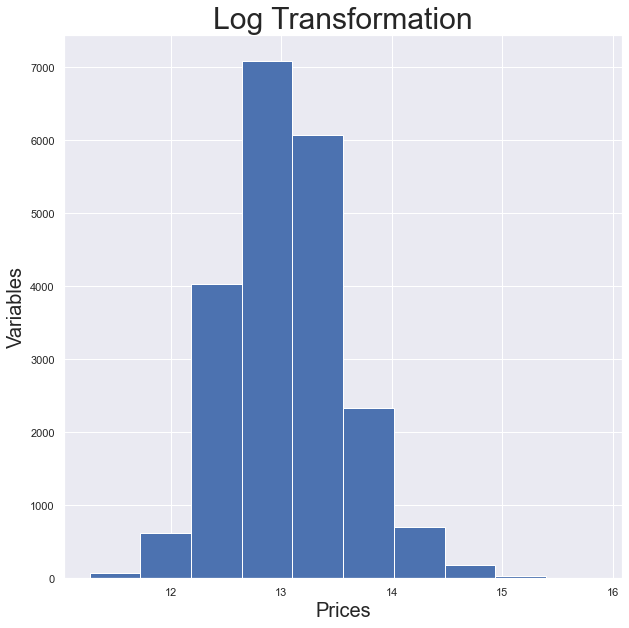

In [81]:
#see how the shape of price changed
df_price_log['price'].hist(figsize = (10,10)) 
plt.title('Log Transformation', fontsize = 30)
plt.xlabel('Prices', fontsize = 20)
plt.ylabel('Variables', fontsize = 20)

The odf_price_log looks good. So that’s what we're going to use in our EDA.

### KDE plots

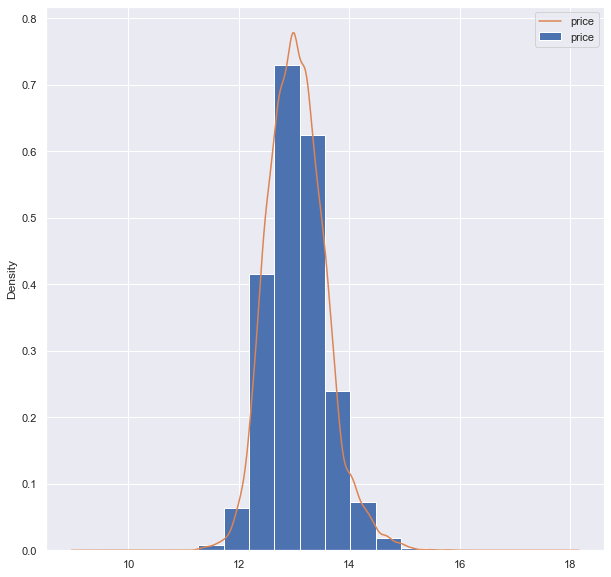

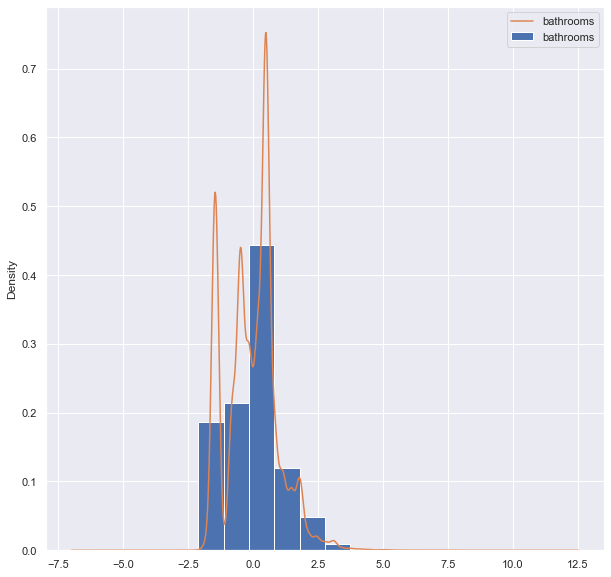

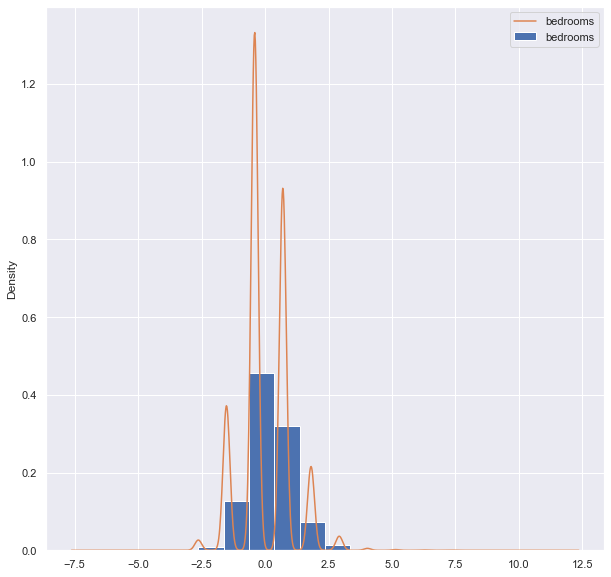

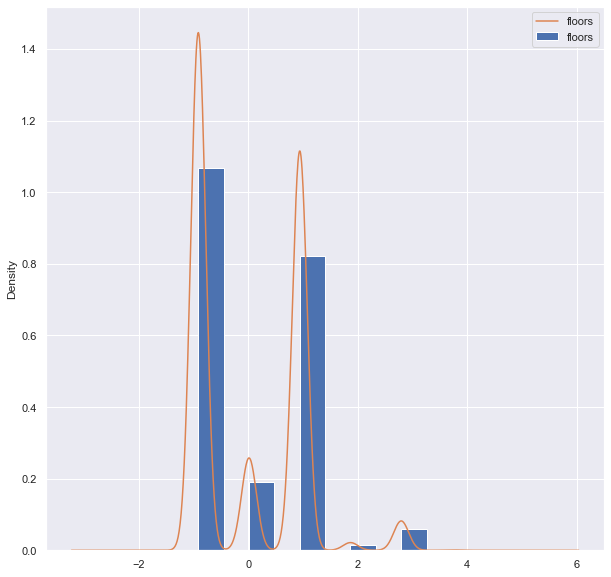

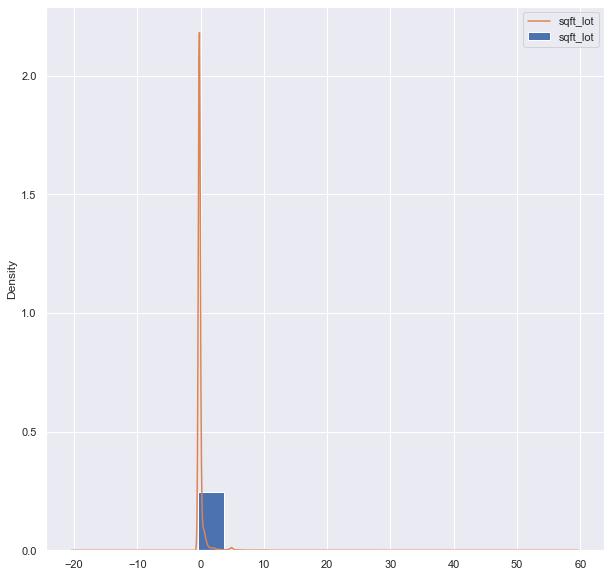

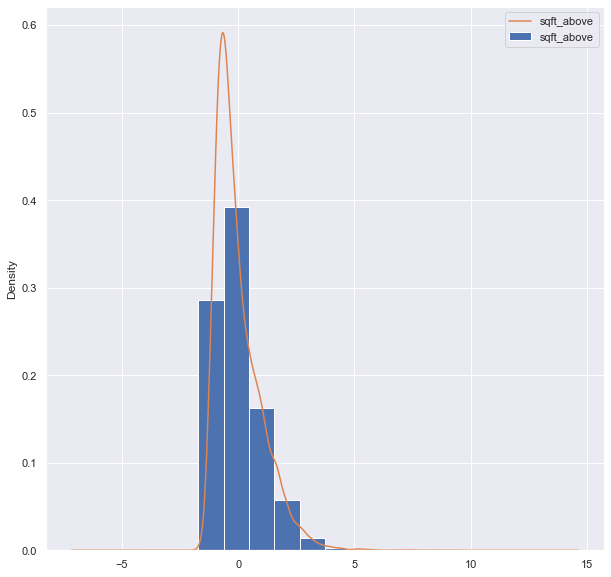

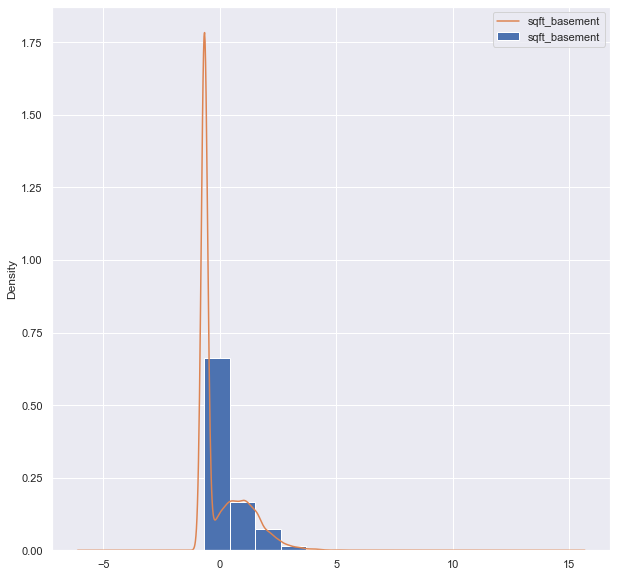

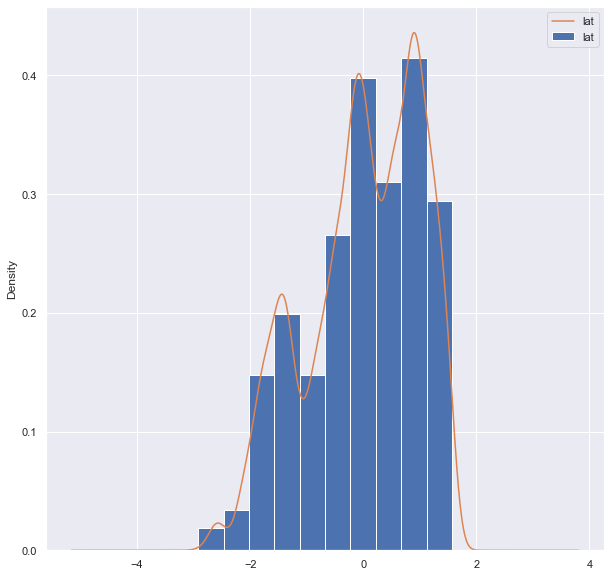

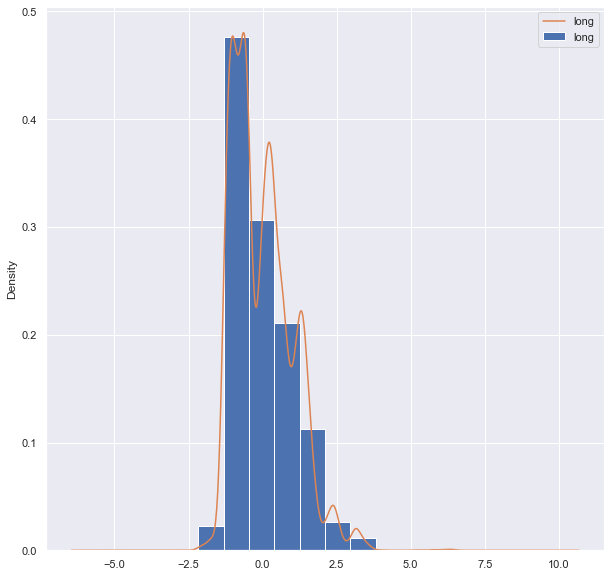

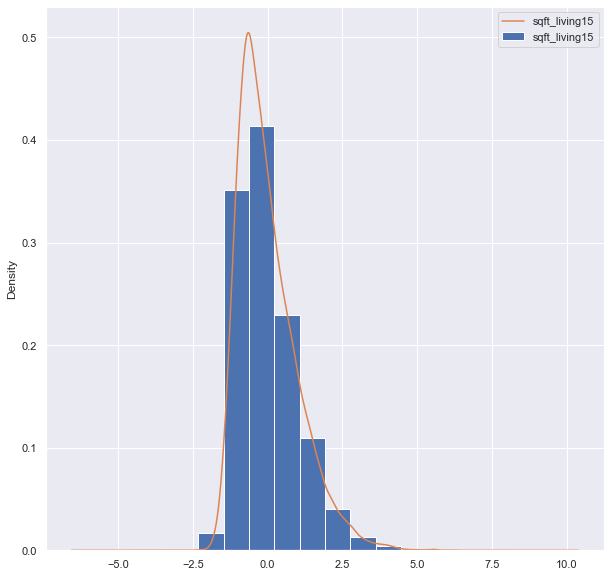

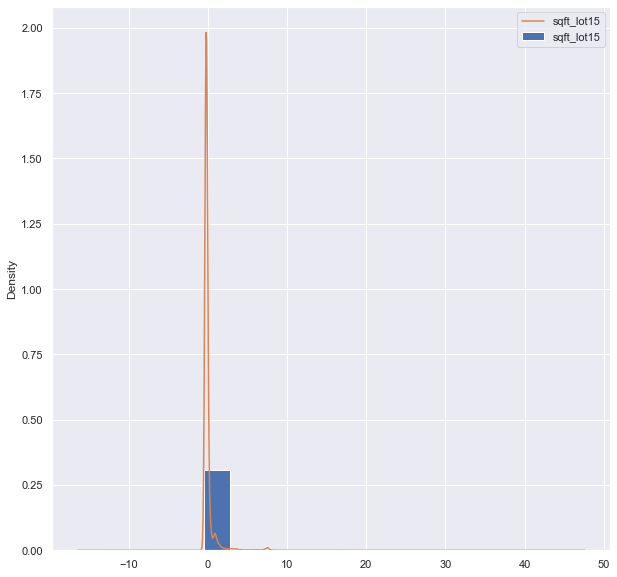

In [82]:
headers = list (df_price_log) #creating list of columns from our standard scaled data
#creating a for Loop to iterate through our list of columns
for column in headers:
      df_price_log[column].plot.hist (density=True) #creating a histogram
      df_price_log[column].plot.kde (label=column) #creating a KDE plot
      plt.legend() #including a Legend for each plot
      plt.show()


The KDE plots make it easier to see how the data is distributed. Most of the data looks a little bit more normal with the KDE plot, like sqft_basement and long, so that’s a plus.

Bedroom’s shape also looks closer to normal. Thanks to our log transformation price looks very normal. However, with some of the variables such as bathrooms, it's showing higher peaks than we expected and less normality. It also looks like lat and floors almost border on being multimodal.

Now let’s use some joint plots to see the relationship between our predictors and our target variable. Our joint plots will let us see not only distributions and kde plot but also scatter plots and simple regression lines.


### Looking at Relationships in our Numerical Data.

#### Joint plots

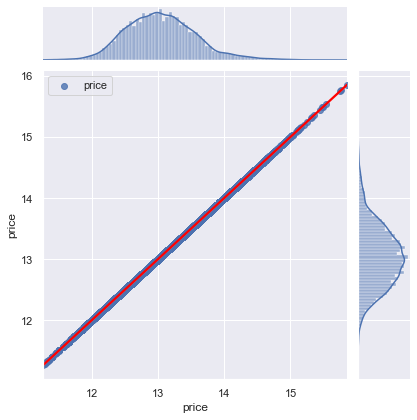

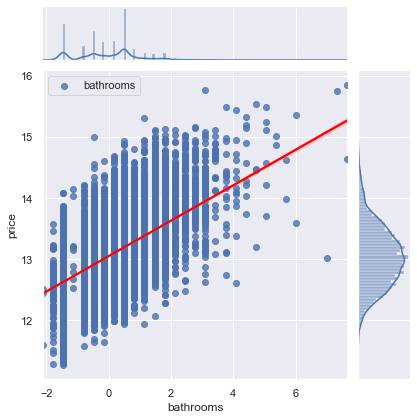

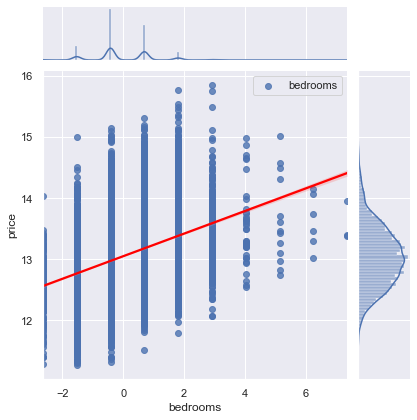

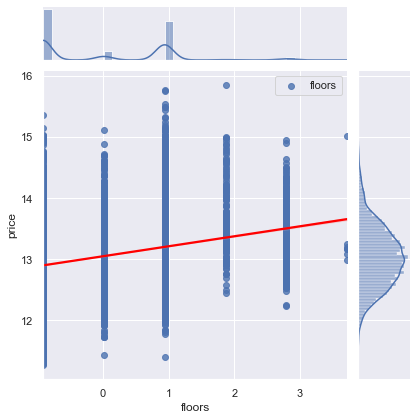

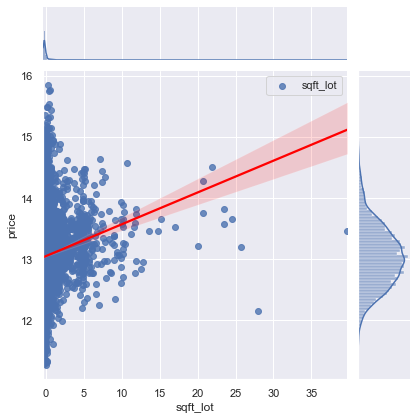

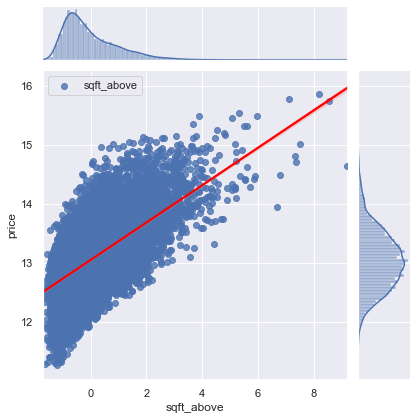

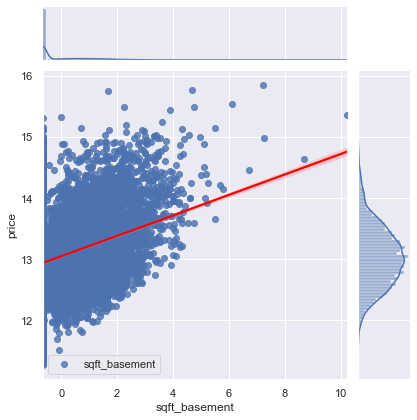

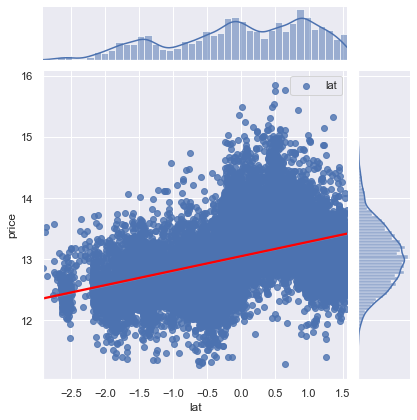

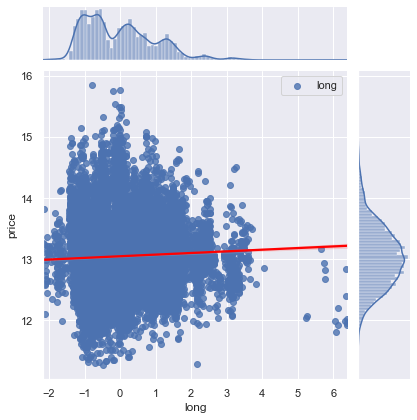

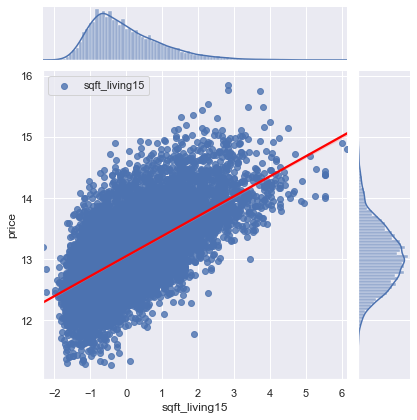

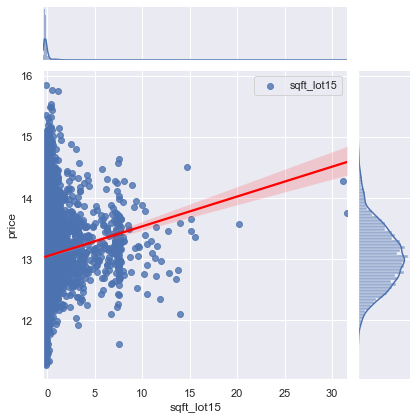

In [84]:
#once again just iterating through our list of columns so that we get each separate plot
for column in headers:
    sns.jointplot(x=column, y="price", #creating our joint plot as well as setting our columns to be predictors and price to be c
                  data=df_price_log, #we want the jointplots to be created using our df_price_log dataset
                  kind='reg',
                  label=column,
                  joint_kws={'line_kws':{'color':'red'}}) #stylistic choices
    plt.legend() #including a legend for our plots
    plt.show()


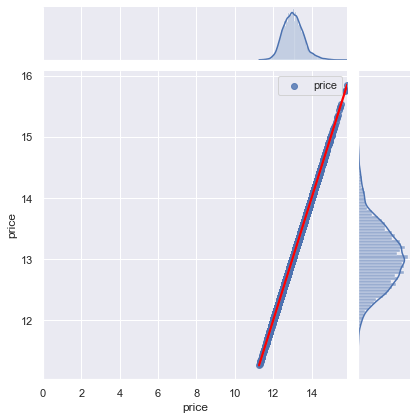

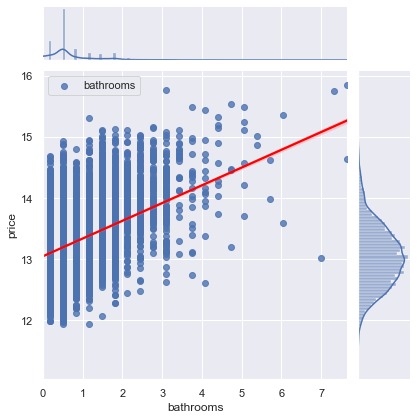

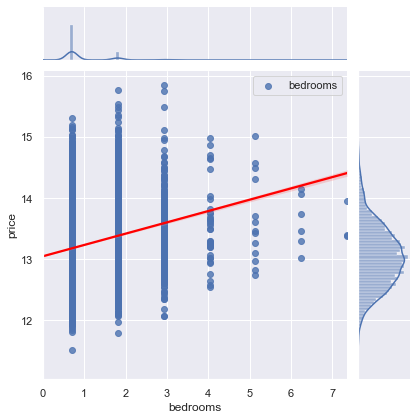

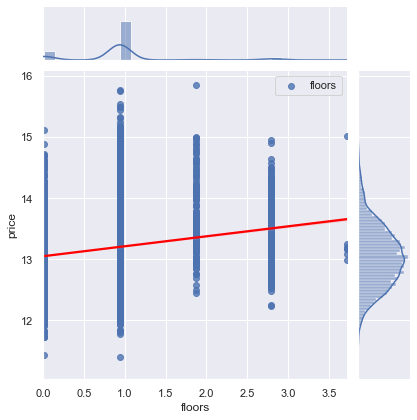

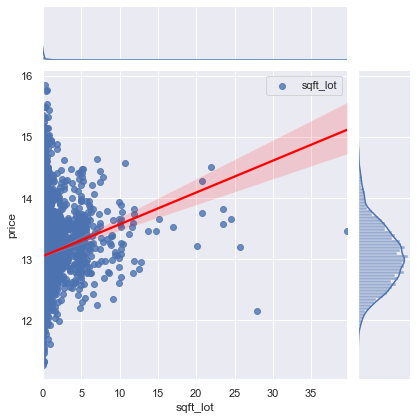

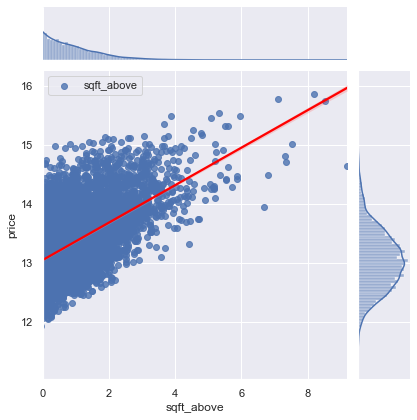

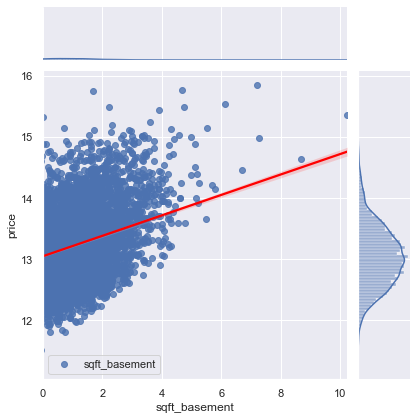

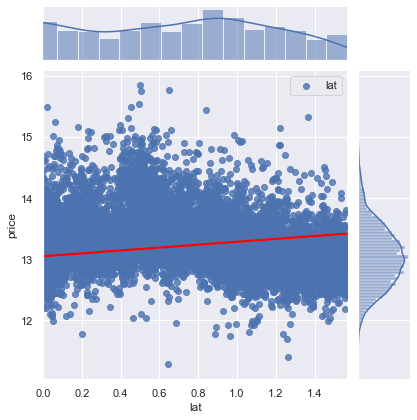

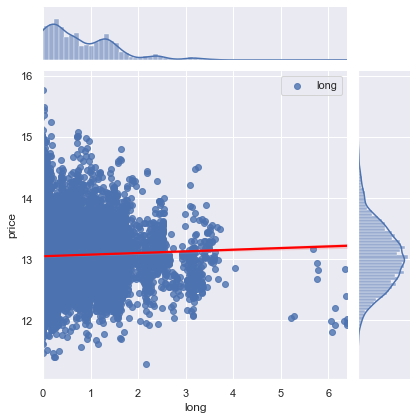

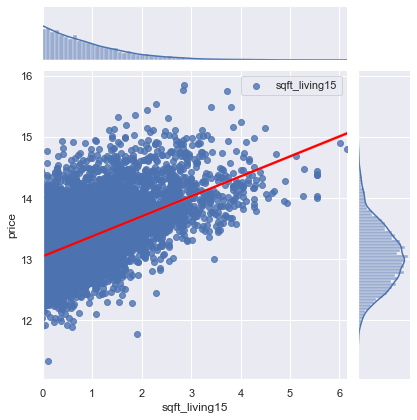

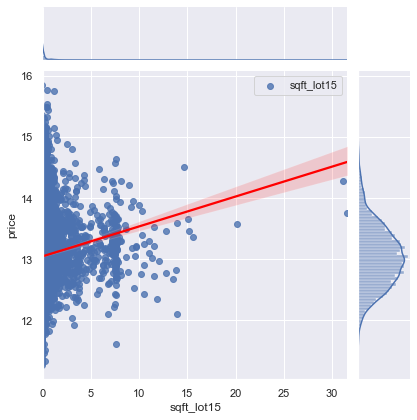

In [85]:
#once again just iterating through our list of columns so that we get each separate plot
# taking into consideration that number of bedrooms, bathrooms and sqft_living15 cannot be negative, we put limits on our x-axis
for column in headers:
    sns.jointplot(x=column, y="price", #creating our joint plot as well as setting our columns to be predictors and price to be c
                  data=df_price_log, #we want the jointplots to be created using our df_price_log dataset
                  kind='reg',
                  label=column,
                  joint_kws={'line_kws':{'color':'red'}}) #stylistic choices
    plt.legend() #including a legend for our plots
    plt.xlim(xmin=0)
    plt.show()

There aren't too many surprises compared to the plots that we viewed earlier, however we are seeing some clear relationships between our predictors and target. Some of our data is not as normally distributed as we would like it to be, but we can see some other patterns that we have missed before.

It looks like bathrooms, bedrooms, sqft_lot, sqft_basement, sqft above, sqft_living15, sqft_lot15 have very strong positive relationships with price. This is the majority of our data, which is good!

Lat and floors have slighty weaker positive relationships with price, but it still looks somewhat promising.

There is an almost completely flat line in long, representing that there is no linear relationship with price.

**To answer the questions that we posed earlier**

- Lat and floors have slighty weaker positive relationships with price, but it still looks somewhat promising.

- There is an almost completely flat line in long, representing that there is no linear relationship with price.

**To answer the questions that we posed earlier**

- How about bathrooms versus bedrooms? It's kind of hard to say which of these variables has a stronger relationship with price from the joint plot. They both look like they have clear positive relationships, but bathrooms looks a little stronger.

- Are there any negative relationships in our data? We did not notice any negative relationships, which is somewhat expected given that a great deal of our predictors have to do with size of the house or the lot. Every relationship between the predictors and the target is either upwards sloping or flat.

- sqft_lot15 and sqft_living15, which is more important to the buyer? Sqft_living15 appears to be more important than sqft_lot15.


In [86]:
# we’re ready to go ahead and add our categorical  data to our numerical data
df_combo = pd.concat([df_price_log, df_cat], axis = 1)#combining our cat data and num data
df_combo.head()


price  bathrooms  bedrooms    floors  sqft_lot  sqft_above  \
0  12.309982  -1.452176 -0.411672 -0.915323 -0.229017   -0.735224   
1  13.195614   0.174286 -0.411672  0.939094 -0.190387    0.459819   
2  12.100712  -1.452176 -1.521910 -0.915323 -0.123463   -1.230140   
3  13.311329   1.150164  0.698566 -0.915323 -0.244790   -0.892148   
4  13.142166  -0.151006 -0.411672 -0.915323 -0.170053   -0.131667   

   sqft_basement       lat      long  sqft_living15  ...  month_summer  \
0      -0.659474 -0.354043 -0.306807      -0.944074  ...             0   
1       0.244461  1.159718 -0.747781      -0.433629  ...             0   
2      -0.659474  1.281656 -0.136107       1.068537  ...             0   
3       1.396978 -0.284776 -1.274106      -0.914905  ...             0   
4      -0.659474  0.407888  1.201043      -0.273204  ...             0   

   month_fall  view_not_viewed  view_viewed  yr_built_1900_thru_1951  \
0           1                1            0                        0   
1           0                1            0                        1   
2           0                1            0                        1   
3           0                1            0                        0   
4           0                1            0                        0   

   yr_built_1952_thru_1974  yr_built_1975_thru_1996  yr_built_1997_thru_2015  \
0                        1                        0                        0   
1                        0                        0                        0   
2                        0                        0                        0   
3                        1                        0                        0   
4                        0                        1                        0   

   yr_renovated_not_renovated  yr_renovated_renovated  
0                           1                       0  
1                           0                       1  
2                           1                       0  
3                           1                       0  
4                           1                       0  

[5 rows x 100 columns]

In [87]:
#let’s make sure everything is still correctly encoded
df_combo.dtypes[:20]

price            float64
bathrooms        float64
bedrooms         float64
floors           float64
sqft_lot         float64
sqft_above       float64
sqft_basement    float64
lat              float64
long             float64
sqft_living15    float64
sqft_lot15       float64
condition_0        uint8
condition_1        uint8
condition_2        uint8
condition_3        uint8
condition_4        uint8
waterfront_0       uint8
waterfront_1       uint8
zipcode_98001      uint8
zipcode_98002      uint8
dtype: object

In [88]:
#it looks like our categorical variables were converted to units,
#lets make sure they are categorised!
for cat_names in df_combo.iloc[:,11:].columns:
    df_combo[cat_names]  = df_combo[cat_names].astype('category')


In [89]:
#let’s make sure everything is still correctly encoded
df_combo.dtypes[:20]

price             float64
bathrooms         float64
bedrooms          float64
floors            float64
sqft_lot          float64
sqft_above        float64
sqft_basement     float64
lat               float64
long              float64
sqft_living15     float64
sqft_lot15        float64
condition_0      category
condition_1      category
condition_2      category
condition_3      category
condition_4      category
waterfront_0     category
waterfront_1     category
zipcode_98001    category
zipcode_98002    category
dtype: object

### Modeling Our Data

#### OLS Regression - Numerical Variables

Now let’s get started with modelling some data . We will be using the ordinary least squares (ols)


In [90]:
#importing the necessary Libraries
import statsmodels.api as sm 
import statsmodels. formula.api as smf

col_names = df_combo.describe().columns [1:11]
results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]] #creating an array to easily see the results we care abou
for idx, val in enumerate(col_names):#iterating through List of column names
#while also numbering them (that's the enumerate function)
    print("price~"+ val) #Labeling our results with their respective values
    f = 'price~' + val #building the formula
    model=smf.ols (formula=f, data=df_combo).fit() #fitting the Line
    X_new = pd.DataFrame({val: [df_combo[val].min(), df_combo [val].max()]}); # making a dataframe with the min and max values of
    preds=model.predict (X_new) #creating as well as storing our predictions
    results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ]) #adding each value's data to
    print (results[idx+1]) #viewing our results
    print (model.summary())




price~bathrooms
['bathrooms', 0.30373623283912465, 13.048406301533236, 0.290262039199329, 0.0]
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     9222.
Date:                Mon, 16 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:55:27   Log-Likelihood:                -12615.
No. Observations:               21141   AIC:                         2.523e+04
Df Residuals:                   21139   BIC:                         2.525e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [91]:
#reviewing our data in a neat little table
pd.DataFrame(results)

0           1          2          3            4
0         ind_var   r_squared  intercept      slope      p-value
1       bathrooms    0.303736    13.0484   0.290262            0
2        bedrooms    0.123409    13.0484   0.185019            0
3          floors   0.0961882    13.0484   0.163344            0
4        sqft_lot  0.00979682    13.0484  0.0521296  3.54787e-47
5      sqft_above    0.361802    13.0484   0.316794            0
6   sqft_basement    0.100845    13.0484   0.167251            0
7             lat     0.20184    13.0484   0.236617            0
8            long  0.00258945    13.0484  0.0268007  1.32894e-13
9   sqft_living15    0.384891    13.0484   0.326746            0
10     sqft_lot15  0.00859675    13.0484  0.0488325  1.37353e-41

In terms of r-squared, it looks like some of our values are pretty low. The highest ones are sqft_living15 with 0.385, sqft_above with 0.362, bathrooms with 0.304, and lat with 0.202. Bedrooms comes in 5th 0.123 followed by sqft_basement with .101.

The rest of the predictors have r-squared values smaller than 0.1. The smallest r-squared value is long with a value of 0.0025.

The r-squared value is important because it tells us what percentage of the variance in our target variable (price) around its mean is explained by our model.

All of the p-values are also very low (below .05, that is), which we appreciate because it shows that our results are significant.

The levels of skewness and kurtosis (anything above 1 or 3, respectively, is considered positively skewed/high) are not terrible.

While most of the values have kurtosis hovering between 3 and 4, none of them go above 4 except for lat. Additionally. With the exception of lat, all of the values measuring skew are below 5.

Overall, we are content with our results. Let's look at our model overall.


In [92]:
formula = 'price~' + ' + '.join(col_names) #defining our formula
mod=smf.ols (formula=formula, data = df_combo)#completing an ols regression on our model overall
res = mod.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.690
Method:                 Least Squares   F-statistic:                     4715.
Date:                Mon, 16 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:55:27   Log-Likelihood:                -4043.4
No. Observations:               21141   AIC:                             8109.
Df Residuals:                   21130   BIC:                             8196.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        13.0484      0.002   6474.148      0.000      13.044      13.052
bathrooms         0.0392      0.003     11.418      0.000       0.032       0.046
bedrooms         -0.0309      0.003    -12.030      0.000      -0.036      -0.026
floors            0.0255      0.003      9.329      0.000       0.020       0.031
sqft_lot          0.0265      0.003      9.052      0.000       0.021       0.032
sqft_above        0.2200      0.004     53.584      0.000       0.212       0.228
sqft_basement     0.1256      0.003     45.885      0.000       0.120       0.131
lat               0.2073      0.002    100.328      0.000       0.203       0.211
long             -0.0579      0.002    -25.269      0.000      -0.062      -0.053
sqft_living15     0.1304      0.003     40.158      0.000       0.124       0.137
sqft_lot15       -0.0090      0.003     -3.064      0.002      -0.015      -0.003
==============================================================================
Omnibus:                      296.317   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              542.003
Skew:                           0.058   Prob(JB):                    2.02e-118
Kurtosis:                       3.776   Cond. No.                         4.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

It looks like our r-squared overall for the numerical data is .69, which is not terrible. The difference between r-squared and r-squared adjusted is negligible.

The skew is slight and the level of kurtosis is not perfect, but we are not too concerned about it. Let's now take a look at what our categorical data does.


### OLS Regression - Categorical Variables

In [93]:
#matching the data with their respective columns
#we have to drop one column from each variable to prevent singularity
cols_condition = df_combo.columns[11:15]
cols_waterfront = df_combo.columns [16:17]
cols_zipcode = df_combo.columns [18:87]
cols_season = df_combo.columns[88:91]
cols_view = df_combo.columns[92:93]
cols_yr_built = df_combo.columns[94:97]
cols_yr_renovated =  df_combo.columns [98:99]


In [94]:
#time for our OLS regression!
cols =  [cols_waterfront, cols_condition, cols_zipcode, cols_season, cols_view, cols_yr_built, cols_yr_renovated] #creating a lis
for col in cols: #creating a for Loop
    sum_cols = "+".join(col) #sadding each variable to our formula
    form =  "price ~" + sum_cols #creating our formula
    model=smf.ols (formula=form, data= df_combo).fit() #fitting our model
    print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     634.1
Date:                Mon, 16 Jan 2023   Prob (F-statistic):          6.78e-138
Time:                        16:55:27   Log-Likelihood:                -16130.
No. Observations:               21141   AIC:                         3.226e+04
Df Residuals:                   21139   BIC:                         3.228e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.1414      0.04

Well, those results are slightly disappointing. With the exception of zipcode and view, all of our categorical variables have r-squared values below .05.

View has an r-squared value of .097. Zipcode provides our best r-squared value yet, with a value of .531.

Zipcode also has a very low p-value, demonstrating significance.


### Our Final Model

Based on the results, we think it is safe to eliminate a few predictors. We will now make a new dataframe that consists only of the predictors that had r2 values greater than or equal to .1.

We will also be dropping a column from zipcodes and a column from view in our final model to prevent singularity.


In [95]:
#first we create a new dataframe called "df final" that
#only has the columns that we want to keep.
#first dropping continuous variables
df_final= df_combo.drop(["sqft_lot","long", "sqft_lot15"], axis=1)


In [96]:
#dropping waterfront and condition columns
df_final = df_final.drop(df_final.columns [8:15], axis=1) 

In [97]:
#dropping season, 1 view column and 1 zipcode column
df_final = df_final.drop(df_final.columns [77:83], axis=1)

In [98]:
#dropping yr_built and yr_renovated
df_final = df_final.drop(df_final.columns [78:84], axis=1)

In [99]:
#let's see what our final model Looks Like
final_cols = df_final.drop (['price'], axis=1)
formula = 'price ~' + '+'.join(final_cols)
mod = smf.ols (formula = formula,data = df_final)
res = mod.fit()
res.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1553.
Date:                Mon, 16 Jan 2023   Prob (F-statistic):               0.00
Time:                        16:55:28   Log-Likelihood:                 3625.7
No. Observations:               21141   AIC:                            -7095.
Df Residuals:                   21063   BIC:                            -6475.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             13.4101      0.014    983.973      0.000      13.383      13.437
zipcode_98001[T.1]    -0.7400      0.032    -23.292      0.000      -0.802      -0.678
zipcode_98002[T.1]    -0.7750      0.033    -23.316      0.000      -0.840      -0.710
zipcode_98003[T.1]    -0.7122      0.032    -22.372      0.000      -0.775      -0.650
zipcode_98004[T.1]     0.2375      0.017     14.246      0.000       0.205       0.270
zipcode_98005[T.1]    -0.1075      0.020     -5.390      0.000      -0.147      -0.068
zipcode_98006[T.1]    -0.1925      0.017    -11.565      0.000      -0.225      -0.160
zipcode_98007[T.1]    -0.1927      0.021     -9.121      0.000      -0.234      -0.151
zipcode_98008[T.1]    -0.1917      0.017    -11.190      0.000      -0.225      -0.158
zipcode_98010[T.1]    -0.4867      0.035    -13.964      0.000      -0.555      -0.418
zipcode_98011[T.1]    -0.5178      0.021    -25.029      0.000      -0.558      -0.477
zipcode_98014[T.1]    -0.5848      0.022    -26.640      0.000      -0.628      -0.542
zipcode_98019[T.1]    -0.6341      0.020    -31.312      0.000      -0.674      -0.594
zipcode_98022[T.1]    -0.5921      0.040    -14.930      0.000      -0.670      -0.514
zipcode_98023[T.1]    -0.7642      0.031    -24.417      0.000      -0.826      -0.703
zipcode_98024[T.1]    -0.4124      0.027    -15.382      0.000      -0.465      -0.360
zipcode_98027[T.1]    -0.3169      0.019    -17.059      0.000      -0.353      -0.280
zipcode_98028[T.1]    -0.5382      0.019    -28.339      0.000      -0.575      -0.501
zipcode_98029[T.1]    -0.2398      0.018    -13.314      0.000      -0.275      -0.204
zipcode_98030[T.1]    -0.7244      0.029    -25.376      0.000      -0.780      -0.668
zipcode_98031[T.1]    -0.7074      0.026    -27.008      0.000      -0.759      -0.656
zipcode_98032[T.1]    -0.7790      0.031    -25.006      0.000      -0.840      -0.718
zipcode_98033[T.1]    -0.1146      0.015     -7.393      0.000      -0.145      -0.084
zipcode_98034[T.1]    -0.3862      0.016    -24.553      0.000      -0.417      -0.355
zipcode_98038[T.1]    -0.6163      0.027    -23.035      0.000      -0.669      -0.564
zipcode_98039[T.1]     0.3491      0.032     11.025      0.000       0.287       0.411
zipcode_98040[T.1]     0.0553      0.018      2.993      0.003       0.019       0.092
zipcode_98042[T.1]    -0.7032      0.027    -25.881      0.000      -0.756      -0.650
zipcode_98045[T.1]    -0.4683      0.023    -20.302      0.000      -0.513      -0.423
zipcode_98052[T.1]    -0.2647      0.015    -17.933      0.000      -0.294      -0.236
zipcode_98053[T.1]    -0.3545      0.016    -22.311      0.000      -0.386      -0.323
zipcode_98055[T.1]    -0.6891      0.023    -29.893      0.000      -0.734      -0.644
zipcode_98056[T.1]    -0.5147      0.0

### Feature Rankings

Our model looks great. We are very delighted with our r2 value of .85. 

Let’s still see if we can improve on it using feature elimination.

Feature ranking simply creates a subset of the relevant features.  


In [100]:
#creating a matrix with our predictor and target variables
y= df_final[["price"]]
X = df_final.drop(["price"], axis=1)
X.head()


bathrooms  bedrooms    floors  sqft_above  sqft_basement       lat  \
0  -1.452176 -0.411672 -0.915323   -0.735224      -0.659474 -0.354043   
1   0.174286 -0.411672  0.939094    0.459819       0.244461  1.159718   
2  -1.452176 -1.521910 -0.915323   -1.230140      -0.659474  1.281656   
3   1.150164  0.698566 -0.915323   -0.892148       1.396978 -0.284776   
4  -0.151006 -0.411672 -0.915323   -0.131667      -0.659474  0.407888   

   sqft_living15 zipcode_98001 zipcode_98002 zipcode_98003  ... zipcode_98146  \
0      -0.944074             0             0             0  ...             0   
1      -0.433629             0             0             0  ...             0   
2       1.068537             0             0             0  ...             0   
3      -0.914905             0             0             0  ...             0   
4      -0.273204             0             0             0  ...             0   

  zipcode_98148 zipcode_98155 zipcode_98166 zipcode_98168 zipcode_98177  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

  zipcode_98178 zipcode_98188 zipcode_98198 view_viewed  
0             1             0             0           0  
1             0             0             0           0  
2             0             0             0           0  
3             0             0             0           0  
4             0             0             0           0  

[5 rows x 77 columns]

In [101]:
#now we will commence the feature ranking
from sklearn.feature_selection import RFE #first we are importing the necessary Libraries
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [102]:
r_list = [] #creating Lists to store r squared and r squared adjusted
adj_r_list = []
list_n = list(range(5,66,10)) #creating a loop where we find the 5 best features and then go by increments of 10
for n in list_n:
    select_n = RFE(linreg, n_features_to_select = n)
    select_n = select_n.fit(X, np.ravel(y))
    selected_columns = X.columns[select_n.support_ ]
    linreg.fit(X[selected_columns],y)
    yhat = linreg.predict(X[selected_columns])
    SS_Residual =np.sum((y-yhat) **2)
    SS_Total=np.sum((y-np.mean(y))**2)
    r_squared= 1 - (float(SS_Residual))/SS_Total
    print(r_squared)
    adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1)
    print(adjusted_r_squared)

r_list.append(r_squared)
adj_r_list.append(adjusted_r_squared)


price    0.188828
dtype: float64
price    0.185862
dtype: float64
price    0.319709
dtype: float64
price    0.317222
dtype: float64
price    0.450845
dtype: float64
price    0.448838
dtype: float64
price    0.485334
dtype: float64
price    0.483453
dtype: float64
price    0.770942
dtype: float64
price    0.770104
dtype: float64
price    0.791665
dtype: float64
price    0.790903
dtype: float64
price    0.847321
dtype: float64
price    0.846763
dtype: float64


It doesn't seem to be a difference between our r2 adjusted values. Our r2 value overall is still .85.

It also looks like our r squared value is getting higher as well add more features, but by including 65 features we could be overfitting the line. We can test this using our test-train split.

### Test-Train Split

In [103]:
from sklearn.model_selection import train_test_split #importing necessary Library
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=3) #defining our x and y train and test
#train size is .2, we are using a pretty standard 80/20 split on our test-train split
MSE_test = [] #mean of squared errors Lists for both test and train sets
MSE_train = []
list_n = list (range (5,66,10))
for n in list_n:
    select_n = RFE(linreg, n_features_to_select =n )
    select_n =select_n.fit( X_train,np.ravel(y_train) )
    selected_columns = X.columns [select_n.support_ ]
    linreg.fit(X_train[ selected_columns ], y_train)
    yhat_train = linreg.predict(X_train[selected_columns] )
    yhat_test = linreg.predict(X_test[selected_columns] )
    mse_train = np.sum((y_train - yhat_train)**2)/len(y_train)
    mse_test = np.sum((y_test - yhat_test)**2)/len(y_test)
    print(mse_train)
    print(mse_test)
MSE_test.append(mse_test)
MSE_train.append(mse_train)


price    0.236874
dtype: float64
price    0.231401
dtype: float64
price    0.184426
dtype: float64
price    0.187781
dtype: float64
price    0.151751
dtype: float64
price    0.154316
dtype: float64
price    0.138412
dtype: float64
price    0.139532
dtype: float64
price    0.062468
dtype: float64
price    0.062565
dtype: float64
price    0.057631
dtype: float64
price    0.056668
dtype: float64
price    0.042729
dtype: float64
price    0.040981
dtype: float64


The mse for both train and test both improved with more variables

### K-fold Cross Validation

In [104]:
from sklearn.metrics import mean_squared_error #importing the necessary libaries
from sklearn.model_selection import cross_val_score


In [105]:
select_65= RFE (linreg, n_features_to_select = 65) #using our 65 favorite features
select_65= select_n.fit(X, np.ravel(y))
selected_columns= X. columns[select_n.support_]


In [106]:
cv_10_results = cross_val_score(linreg, X[selected_columns], y, cv=10, scoring="neg_mean_squared_error")
cv_10_results


array([-0.04210912, -0.04794428, -0.04373018, -0.04167544, -0.0403245 ,
       -0.04624399, -0.04126705, -0.04366236, -0.04319759, -0.03705468])

It looks like our negative MSE values are pretty small, which is good! That means that there is not a high level of error in our data.

In [107]:
print(selected_columns) #Let's see which features Landed in our top 65

Index(['sqft_above', 'sqft_basement', 'sqft_living15', 'zipcode_98001',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98006',
       'zipcode_98007', 'zipcode_98008', 'zipcode_98010', 'zipcode_98011',
       'zipcode_98014', 'zipcode_98019', 'zipcode_98022', 'zipcode_98023',
       'zipcode_98024', 'zipcode_98027', 'zipcode_98028', 'zipcode_98029',
       'zipcode_98030', 'zipcode_98031', 'zipcode_98032', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98042',
       'zipcode_98045', 'zipcode_98052', 'zipcode_98053', 'zipcode_98055',
       'zipcode_98056', 'zipcode_98058', 'zipcode_98059', 'zipcode_98065',
       'zipcode_98070', 'zipcode_98072', 'zipcode_98074', 'zipcode_98075',
       'zipcode_98077', 'zipcode_98092', 'zipcode_98102', 'zipcode_98105',
       'zipcode_98106', 'zipcode_98108', 'zipcode_98109', 'zipcode_98112',
       'zipcode_98118', 'zipcode_98119', 'zipcode_98125', 'zipcode_98126',
       'zipcode_98133', 'zip

Interesting. It looks like RFE removed bedrooms, bathrooms, floors, lat, and a few of our zipcode columns

## Conclusion

Our final model only includes the predictor variables that had r2 values of .1 or higher

The final predictors were sqft_living15 with an r2 value of 0.385, sqft_above with 0.362, bathrooms with 0.304, lat with 0.202, bedrooms with 0.123,

sqft_basement with .101, and zipcode with .531. Floors and view both had r2 values of .097 which we rounded up to .1.

All of our predictors are statistically significant with p-values smaller than .05

Our r-squared value overall was .85

### RECOMMENDATIONS

* Square footage is the best predictor of a house's price in King County and homeowners who are interested in selling their homes at a higher price should focus on expanding it.

* When expanding square footage, homeowners should consider building additional bathrooms and bedrooms, as this analysis suggests that number of bathrooms and bedrooms is highly positively related to price.

* Use the current model to predict price ranges by zip code so that home buyers can see what their macro options are for  housing by location and price. The model can also provide general price modifications to a house such as knowing how much an additional bedroom or bathroom would cost, and how the price changes depending on the addition or subtraction of square footage.



### LIMITATIONS AND NEXT STEPS TO TAKE


* The accuracy of our linear regression models might  not be sufficient for launching the business, but they are a step in the right direction. An expert could do a better job making predictions, but of course not at the scale and speed of our models.
* External factors: There are external factors that could affect the housing prices, such as economic conditions, interest rates, and government policies, that are not captured in the data, which could limit the ability of the model to predict future housing prices.
* To make further improvements to our model, we need additional data. To start, better location information, specifically neighborhood level data, historical price information for each house and real time localized information about the housing market.
* Updating the data regularly: Incorporating new data on a regular basis could improve the model's ability to predict current housing prices.


